# Chapter 2: <b>Random Variables</b>

In [2]:
# utils.py (Continuation)
import matplotlib.pyplot as plt
from itertools import accumulate,product

In [3]:
# power: returns cartesian product of a set with itself n times
set_Power = lambda omega,n: set(product(omega,repeat=n))

# To format the dictionary values to 2 decimal floats
get_round_dic = lambda dic:{k:round(float(v),2) for k,v in dic.items()}

In [4]:
# sort_PDF: returns a key sorted distribution of the argument
def sort_PDF(prob_RV):
    return {key:prob_RV[key] for key in sorted(prob_RV.keys())}

In [5]:
# zip : create an iterator that aggregate a collection's elements
# map : applies a function to the elements of a list. 
# create_FiniteRV: Create a distribution by mapping a function on Omega's elements
def create_FiniteRV(Omega, map_X):
    return dict(zip(Omega, map(map_X, Omega)))

In [6]:
# get_InversedFiniteRV: inverses a finite RV distribution (value:key)
def get_InversedFiniteRV(finiteRV):
    return {v:{i for i in finiteRV.keys() if finiteRV[i] == v } for k,v in finiteRV.items()}

In [7]:
# get_PMF: returns the probability distribution P_X of X
def get_PMF(finiteRV, probability_Omega):
    inv_X =  get_InversedFiniteRV(finiteRV)
    prob_values = list(map(sum,
        [[probability_Omega[omega] for omega in event] for event in inv_X.values()]))
    return dict(zip(inv_X.keys(), prob_values))

In [8]:
# accumulate : returns the reduced result by applying the given operation on a set 
# get_CDF: cumulative distribution function CDF of X
def get_CDF(prob_RV):
    sprob_RV =sort_PDF(prob_RV)# {key:prob_RV[key] for key in sorted(prob_RV.keys())}
    return sprob_RV,dict(zip(sprob_RV.keys(), list(accumulate(sprob_RV.values()))))

In [9]:
# plot_Pdf_Cdf: plots PDF and CDF of RV X
def plot_Pdf_Cdf(pdf0, cdf0,  ex=None, choice =None):
    first  = list(pdf0.keys())[0]
    last   = list(pdf0.keys())[-1]
    keys   = [first-1] + list(pdf0.keys()) + [last+1]
    pvalues = [0.0]+ list(pdf0.values())

    fig = plt.figure()
    ncols0 =  2 if choice == None else 1
    axes = fig.subplots(nrows=1, ncols=ncols0)
    axes[0].bar(keys, pvalues + [0.0], width=0.05)
    if ex is not None : axes[0].bar([ex], [1.0] , width=0.05, color='red')

    if not choice:
        cvalues = [0.0]+ list(cdf0.values())
        axes[1].step(keys, [0.0]+ cvalues)

    plt.show()

Omega         :  {('f', 'f'), ('p', 'p'), ('f', 'p'), ('p', 'f')}
ProbaOmega    :  {('f', 'p'): 0.25, ('p', 'f'): 0.25, ('f', 'f'): 0.25, ('p', 'p'): 0.25}
RV dictionary :  {('f', 'f'): 0, ('p', 'p'): 2, ('f', 'p'): 1, ('p', 'f'): 1}
RV Range      :  {0, 1, 2}
inversed RV   :  {0: {('f', 'f')}, 2: {('p', 'p')}, 1: {('f', 'p'), ('p', 'f')}}
P_X RVProbLaw :  {0: 0.25, 2: 0.25, 1: 0.5}
CDF of X      :  {0: 0.25, 1: 0.75, 2: 1.0}


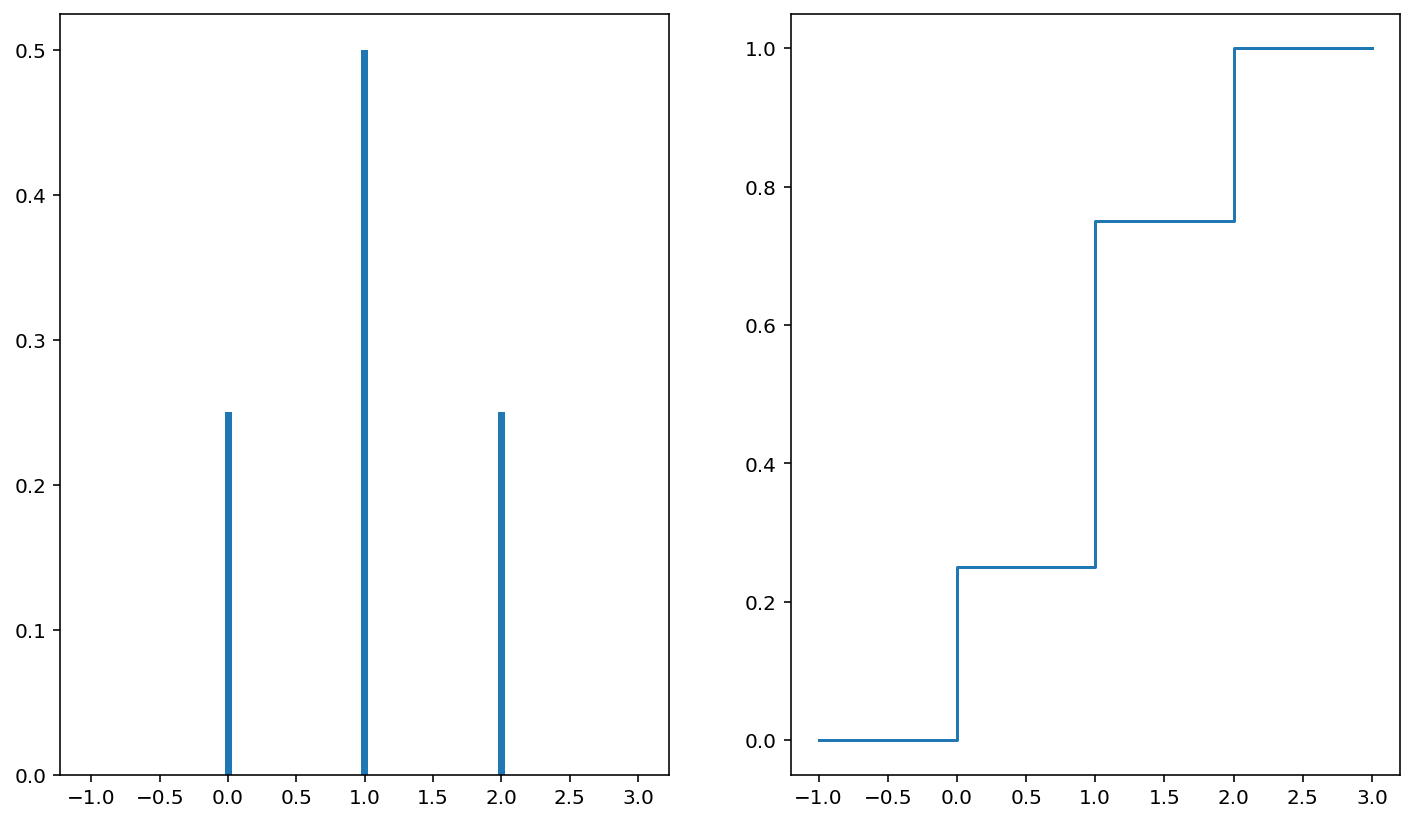

In [10]:
#Code201.py

# Random Variable Implementation : Encapsulate the logic of RV X. p:Tail, f:head
distribution = {('f','p'):1/4, ('p','f'):1/4, ('f','f'):1/4, ('p','p'):1/4}

Omega = set_Power({'p','f'}, 2)           ;print('Omega         : ',Omega)
prob_Omega = distribution                 ;print('ProbaOmega    : ',prob_Omega)

#map_X: counts the number of tails
map_X = lambda a : a.count('p') 
rv_X  = create_FiniteRV(Omega, map_X)     ;print('RV dictionary : ',rv_X)
rng_X = set(rv_X.values())                ;print('RV Range      : ',rng_X)
inv_X = get_InversedFiniteRV(rv_X)        ;print('inversed RV   : ',inv_X)
pdf_X   = get_PMF(rv_X, prob_Omega)       ;print('P_X RVProbLaw : ',pdf_X)
pdf_X, cdf_X = get_CDF(pdf_X)             ;print('CDF of X      : ',cdf_X)

plot_Pdf_Cdf(pdf_X, cdf_X)

#______________________________   Output  ______________________________________
# Omega         :  {('f', 'p'), ('p', 'p'), ('f', 'f'), ('p', 'f')}
# ProbaOmega    :  {('f', 'p'): 0.25, ('p', 'f'): 0.25, ('f', 'f'): 0.25, ('p', 'p'): 0.25}
# RV dictionary :  {('f', 'p'): 1, ('p', 'p'): 2, ('f', 'f'): 0, ('p', 'f'): 1}
# RV Range      :  {0, 1, 2}
# inversed RV   :  {1: {('p', 'f'), ('f', 'p')}, 2: {('p', 'p')}, 0: {('f', 'f')}}
# P_X RVProbLaw :  {1: 0.5, 2: 0.25, 0: 0.25}
# CDF of X      :  {0: 0.25, 1: 0.75, 2: 1.0}

RV map        :  {'o1': 1, 'o2': 2, 'o3': 3}
RV Range      :  {1, 2, 3}
P_X RVProbLaw :  {1: 0.5, 2: 0.33, 3: 0.17}
Cdf of X      :  {1: 0.5, 2: 0.83, 3: 1.0}


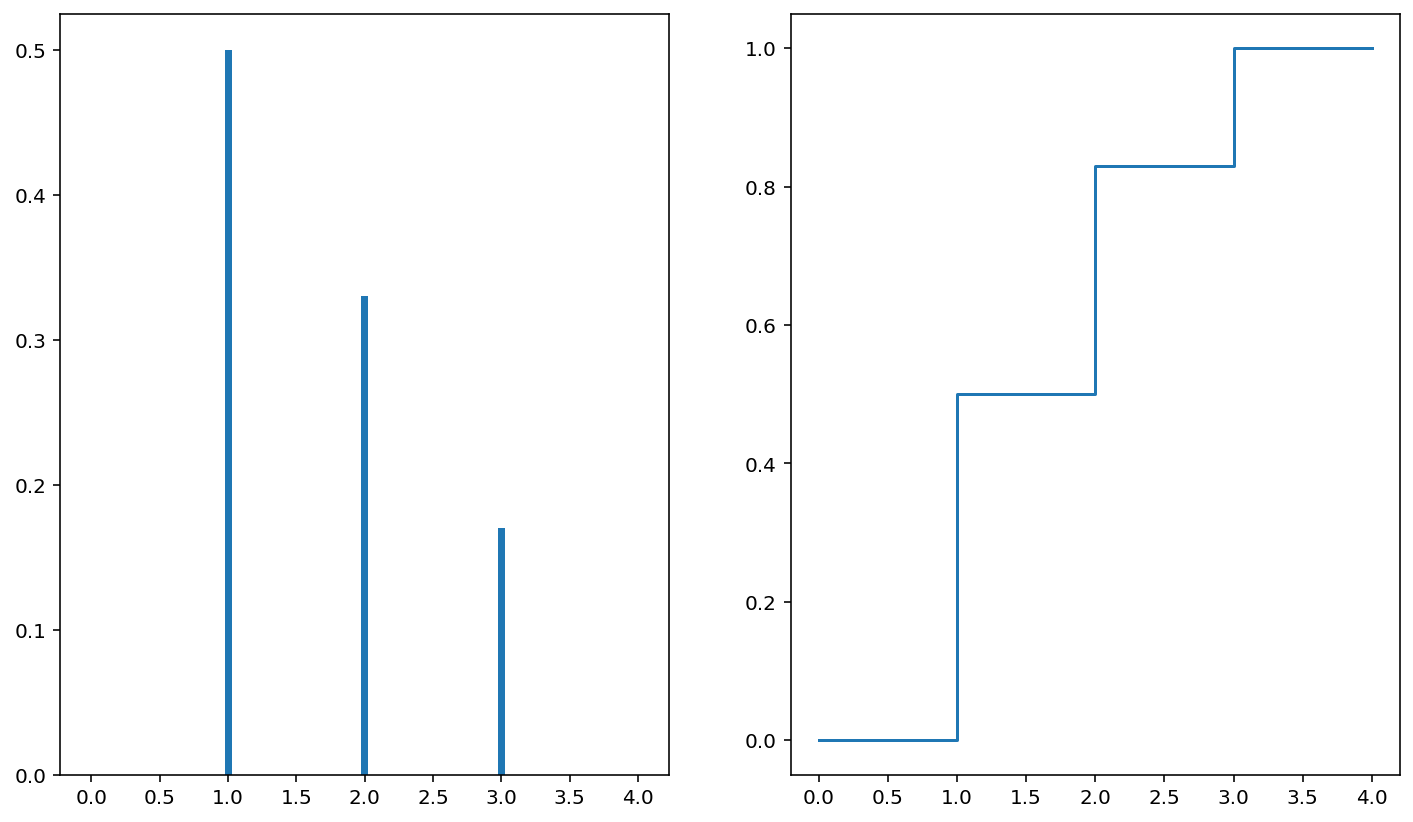

In [11]:
#Code202.py

#dic1: defines a r.v on Omega={o1.o2.o3}, dic2: defines the associated probabilities
dic1,dic2={'o1':1,'o2':2,'o3':3 }, {1:0.5,2:0.33,3:0.17 }

rv_X  = dict(dic1)                      ;print('RV map        : ',rv_X)
rng_X = set(rv_X.values())              ;print('RV Range      : ',rng_X)
pdf_X = get_round_dic(dict(dic2))       ;print('P_X RVProbLaw : ',pdf_X)
pdf_X, cdf_X = get_CDF(pdf_X)           ;print('Cdf of X      : ',get_round_dic(cdf_X))

plot_Pdf_Cdf(pdf_X, cdf_X)

#______________________________   Output  ______________________________________
# RV map        :  {'o1': 1, 'o2': 2, 'o3': 3}
# RV Range      :  {1, 2, 3}
# P_X RVProbLaw :  {1: 0.5, 2: 0.33, 3: 0.17}
# Cdf of X      :  {1: 0.5, 2: 0.83, 3: 1.0}

RV Range :  {0, 1, 2, 3}
pdf_X    :  {0: 0.1, 1: 0.2, 2: 0.3, 3: 0.4}
cdf_X    :  {0: 0.1, 1: 0.3, 2: 0.6, 3: 1.0}
Cdf of X :  {0: 0.1, 1: 0.3, 2: 0.6, 3: 1.0}


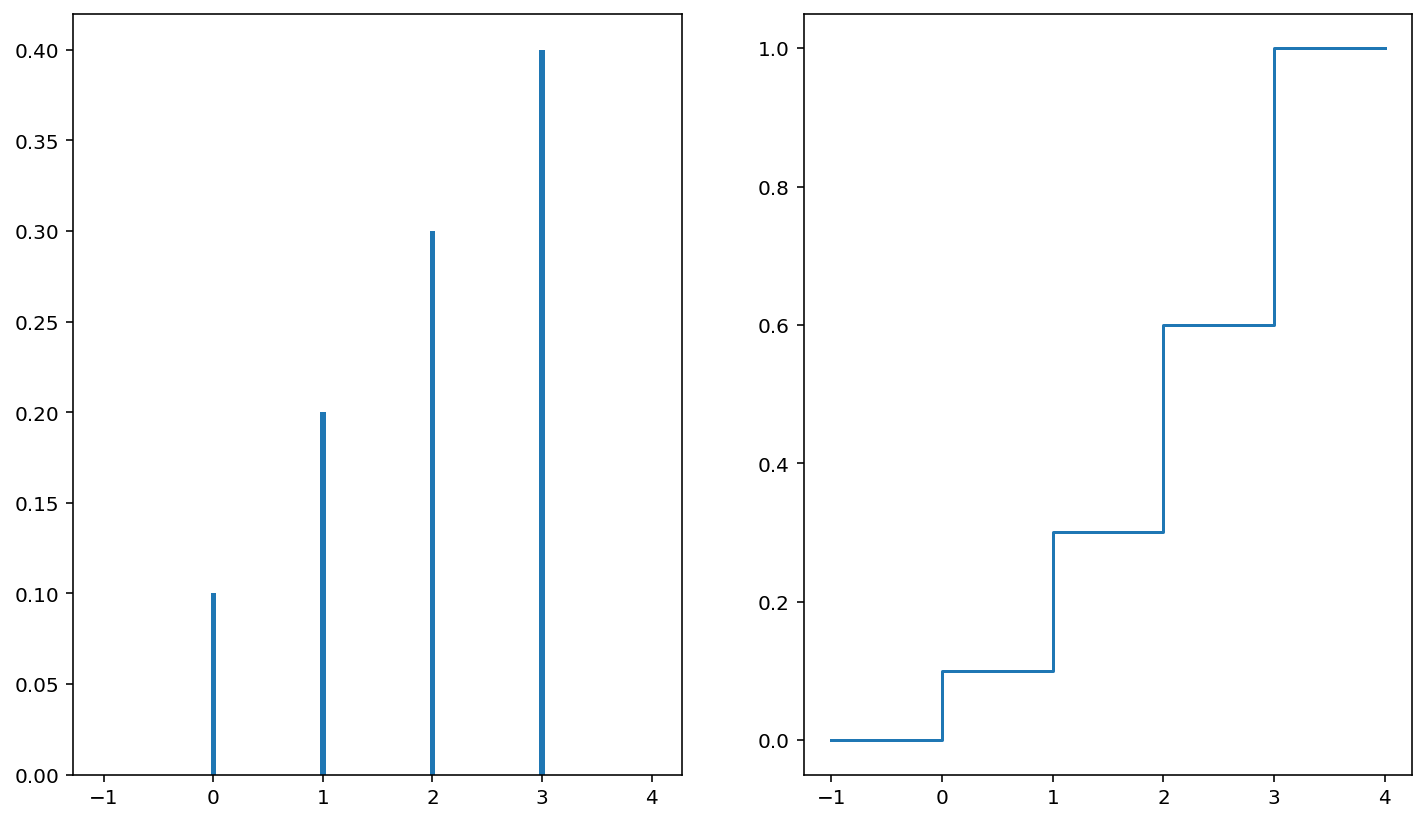

In [12]:
#Code203,py

from sympy.stats import FiniteRV, density, cdf

# distribution of r.v X
pmf = {0:.1,1:0.2,2:.3,3:.4}

rv_X = FiniteRV('X',pmf)                    ;print('RV Range : ',set(pmf.keys()))
pdf_X = get_round_dic(density(rv_X).dict)   ;print('pdf_X    : ',pdf_X)
cdf_X = get_round_dic(cdf(rv_X))            ;print('cdf_X    : ',cdf_X )
spdf_X, cdf_X = get_CDF(pdf_X)              ;print('Cdf of X : ',get_round_dic(cdf_X))

plot_Pdf_Cdf(spdf_X, cdf_X)

#______________________________   Output  ______________________________________
# RV Range :  {0, 1, 2, 3}
# pdf_X    :  {0: 0.1, 1: 0.2, 2: 0.3, 3: 0.4}
# cdf_X    :  {0: 0.1, 1: 0.3, 2: 0.6, 3: 1.0}
# Cdf of X :  {0: 0.1, 1: 0.3, 2: 0.6, 3: 1.0}

RV Range :  {1, 2}
pdf_X    :  {1: 0.66, 2: 0.34}
cdf_X    :  {1: 0.66, 2: 1.0}
Cdf of X :  {1: 0.66, 2: 1.0}
E(X)     :  1.34 , V_X :  0.22


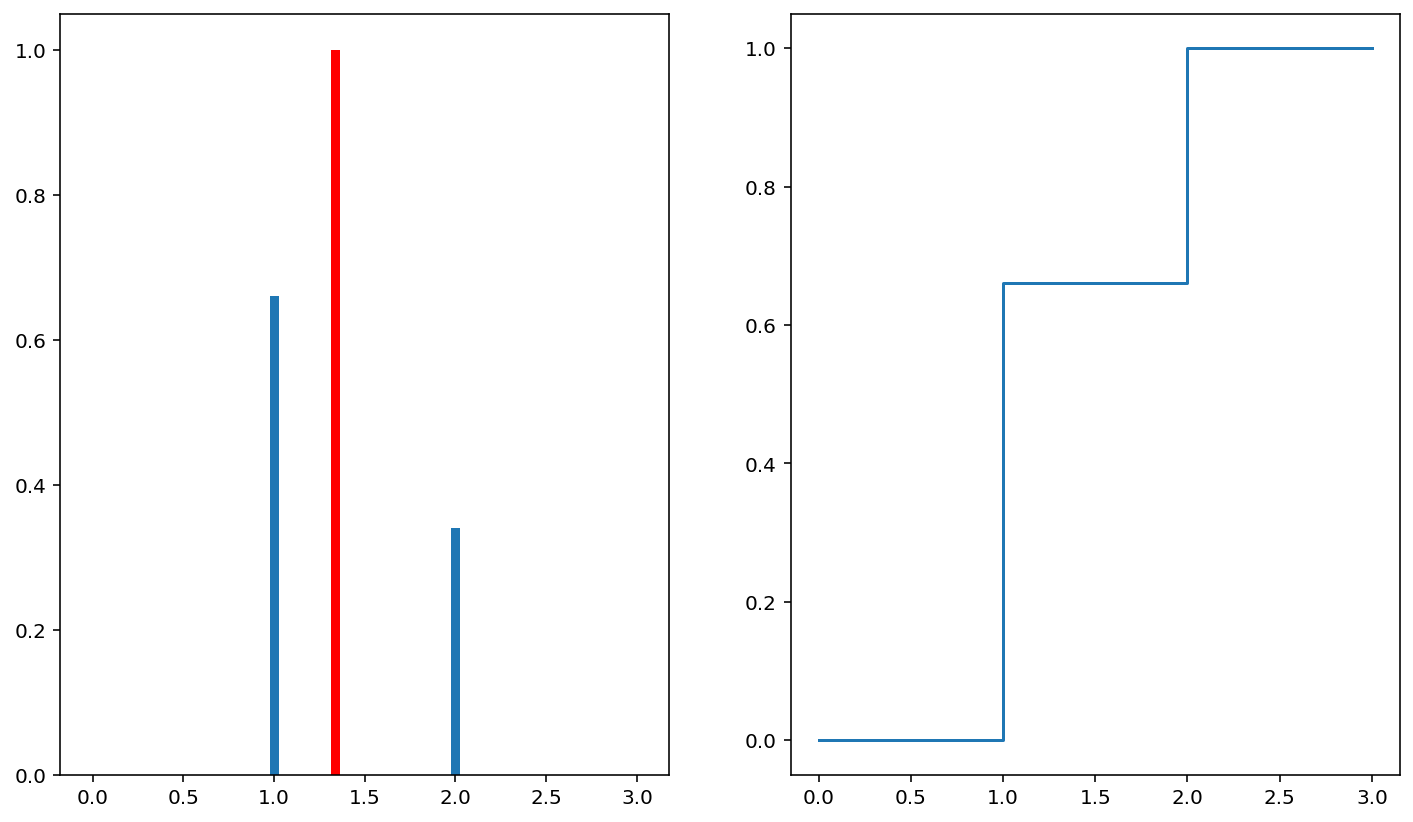

In [13]:
#Code204,py

from sympy.stats import FiniteRV, density, cdf, E, variance

pmf = {1:0.66,2:0.34}

rv_X = FiniteRV('X',pmf)            ;print('RV Range : ',set(pmf.keys()) )
pdf_X = density(rv_X).dict          ;print('pdf_X    : ',pdf_X)
cdf_X = get_round_dic(cdf(rv_X))    ;print('cdf_X    : ',cdf_X)
spdf_X, cdf_X = get_CDF(pdf_X)      ;print('Cdf of X : ',get_round_dic(cdf_X))
E_X, V_X = E(rv_X), variance(rv_X)  ;print('E(X)     : ',round(E_X,2), ', V_X : ', round(V_X,2))

plot_Pdf_Cdf(spdf_X, cdf_X, E_X)

#______________________________   Output  ______________________________________
# RV Range :  {1, 2}
# pdf_X    :  {1: 0.66, 2: 0.34}
# cdf_X    :  {1: 0.66, 2: 1.0}
# Cdf of X :  {1: 0.66, 2: 1.0}
# E(X)     :  1.34 , V_X :  0.22

pdf_Y   :  {2: 0.4, 0: 0.2, 4: 0.2, 6: 0.2}
Range_Y :  {0, 2, 4, 6}
cdf_Y   :  {0: 0.2, 2: 0.6, 4: 0.8, 6: 1.0}
cdf_Y   :  {0: 0.2, 2: 0.6, 4: 0.8, 6: 1.0}
E(Y)    :  2.80 , V(Y): 4.16


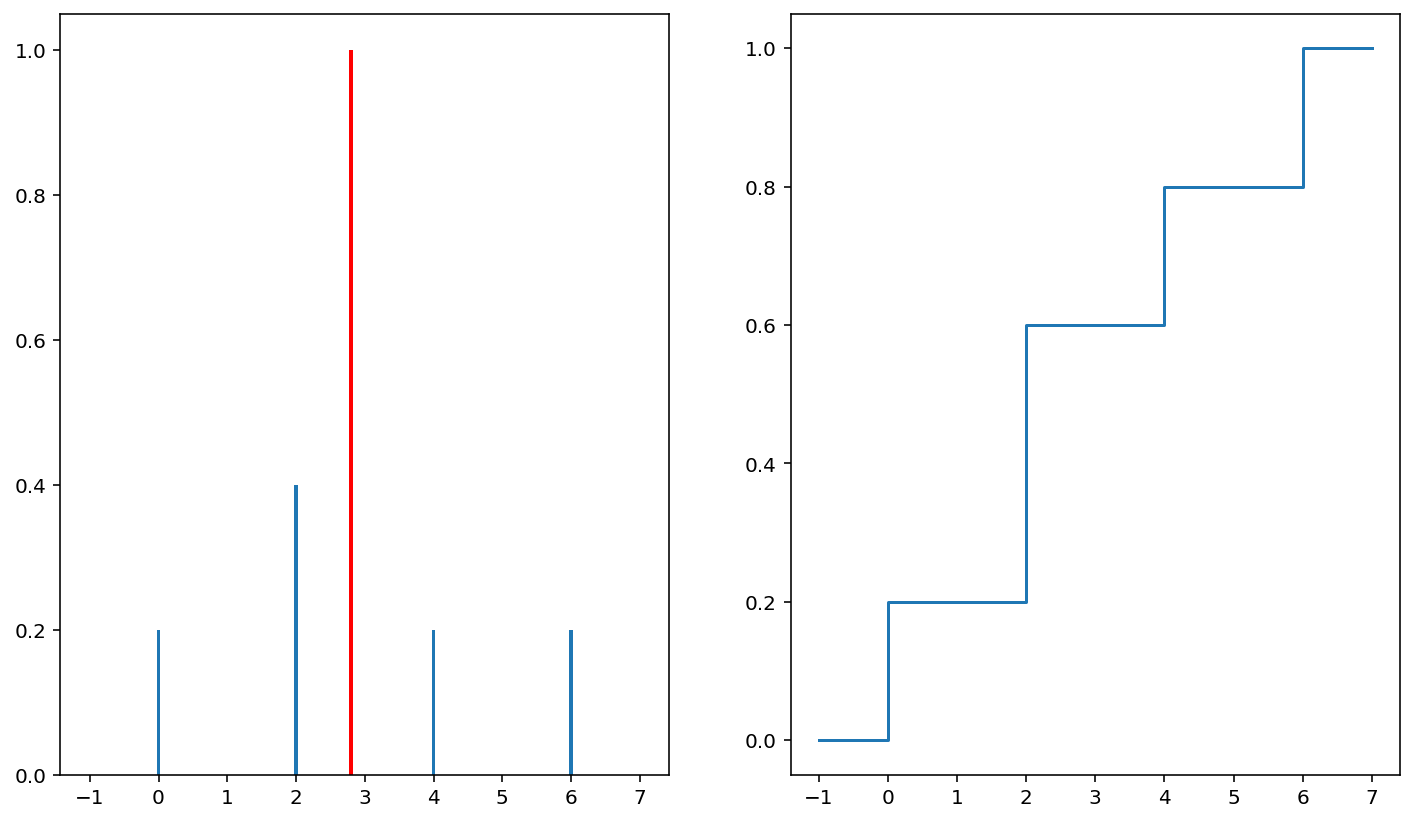

In [14]:
#Code205,py

from sympy.stats import FiniteRV, density, cdf, E, variance
from sympy.functions import Abs

# RV X
pmf = {-1:0.2,0:0.2,1:0.2,2:0.2,3:0.2}
rv_X = FiniteRV('X',pmf)

# RV Y=2|X|
rv_Y = 2 * Abs(rv_X)
pdf_Y = get_round_dic(density(rv_Y).dict)  ;print('pdf_Y   : ',pdf_Y)
rng_Y = set(pdf_Y.keys())                  ;print('Range_Y : ',rng_Y)
cdf_Y =get_round_dic(cdf(rv_Y))            ;print('cdf_Y   : ',cdf_Y )
spdf_Y, cdf_Y = get_CDF(pdf_Y)             ;print('cdf_Y   : ',get_round_dic(cdf_Y))
E_Y = round(E(rv_Y),2)
V_Y =  round(variance(rv_Y),2)             ;print('E(Y)    : ', E_Y, ', V(Y):', V_Y)

plot_Pdf_Cdf(spdf_Y, cdf_Y, E_Y)

#______________________________   Output  ______________________________________
# pdf_Y   :  {2: 0.4, 0: 0.2, 4: 0.2, 6: 0.2}
# Range_Y :  {0, 2, 4, 6}
# cdf_Y   :  {0: 0.2, 2: 0.6, 4: 0.8, 6: 1.0}
# cdf_Y   :  {0: 0.2, 2: 0.6, 4: 0.8, 6: 1.0}
# E(Y)    :  2.80 , V(Y): 4.16

f(x) =  Piecewise((4/x**5, x >= 1), (0, True))
f is normed ? surface =  1
F(t) =  Min(1, t)**(-4) - 1/t**4
Lim x->-oo F(x)=  0 Lim x->+oo F(x)=  1


PDF_X =  Piecewise((Piecewise((4/t**5, t >= 1), (0, True)), (t >= -oo) & (t < oo)), (0, True))
CDF_X =  Min(1, t)**(-4) - 1/t**4


E(X)= 4/3 ,E(X^2)= Piecewise((0, x <= 1), (2 - 2/x**2, True)) = 2 ,Var(X)= 2/9


/usr/local/lib/python3.8/dist-packages/sympy/plotting/experimental_lambdify.py:165: UserWarning: The evaluation of the expression is problematic. We are trying a failback method that may still work. Please report this as a bug.
  warnings.warn('The evaluation of the expression is'


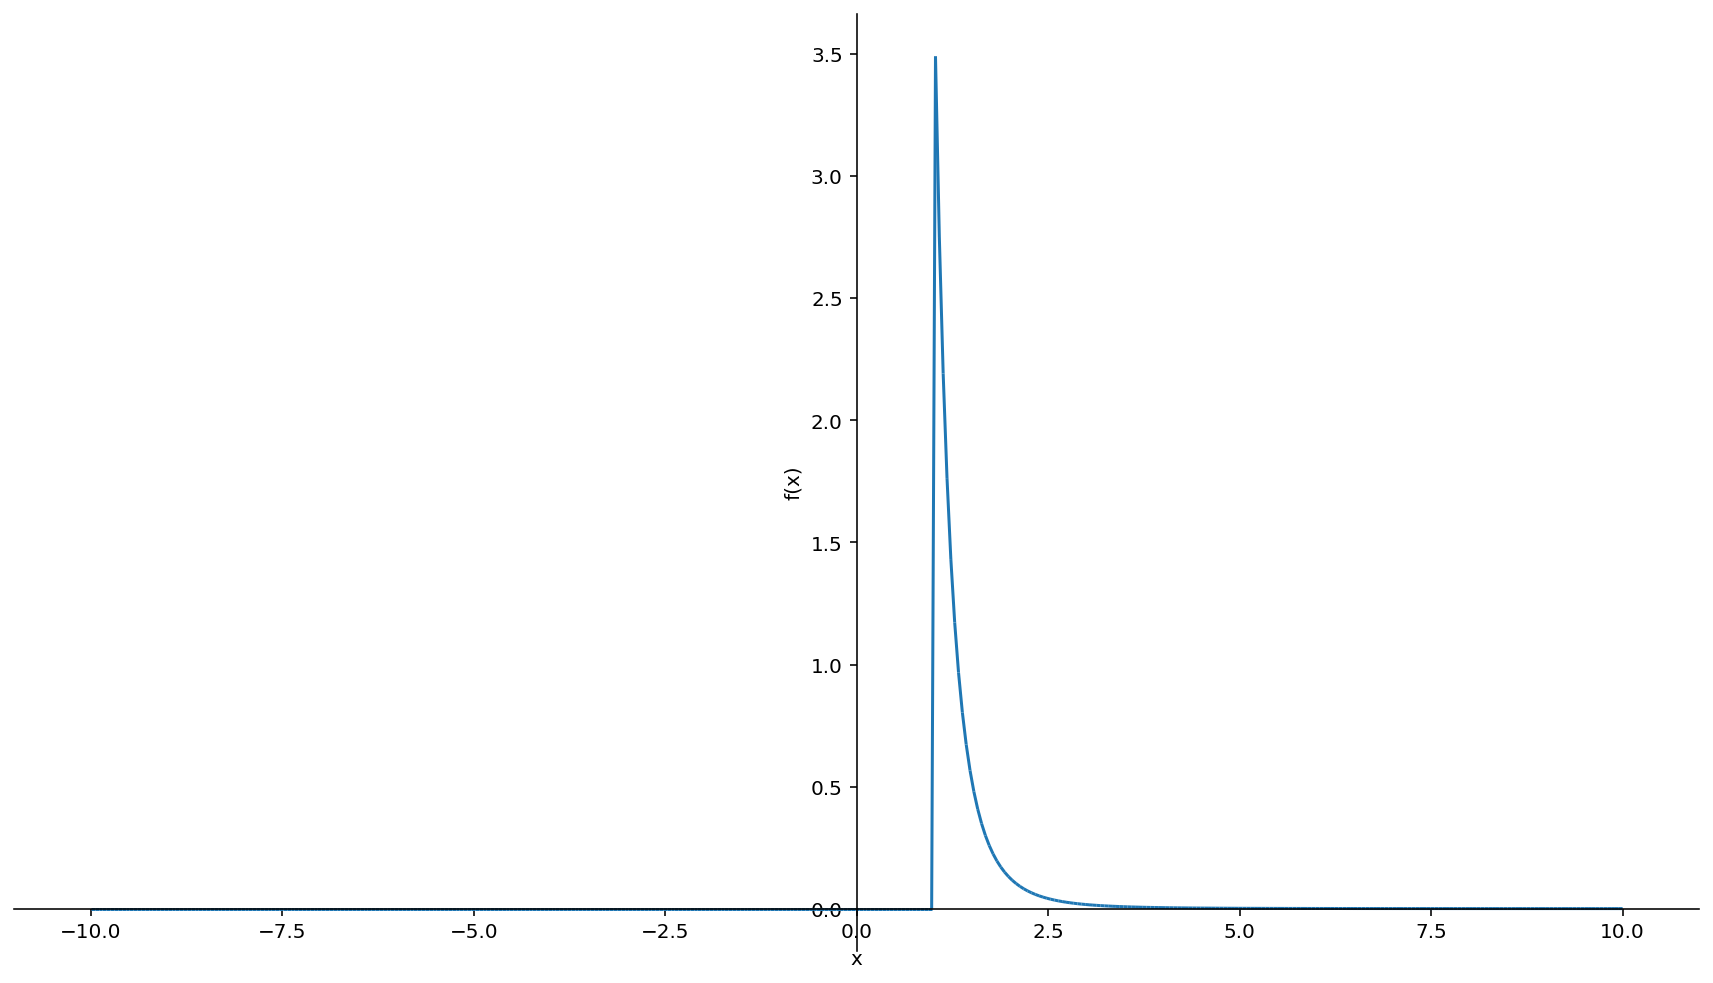

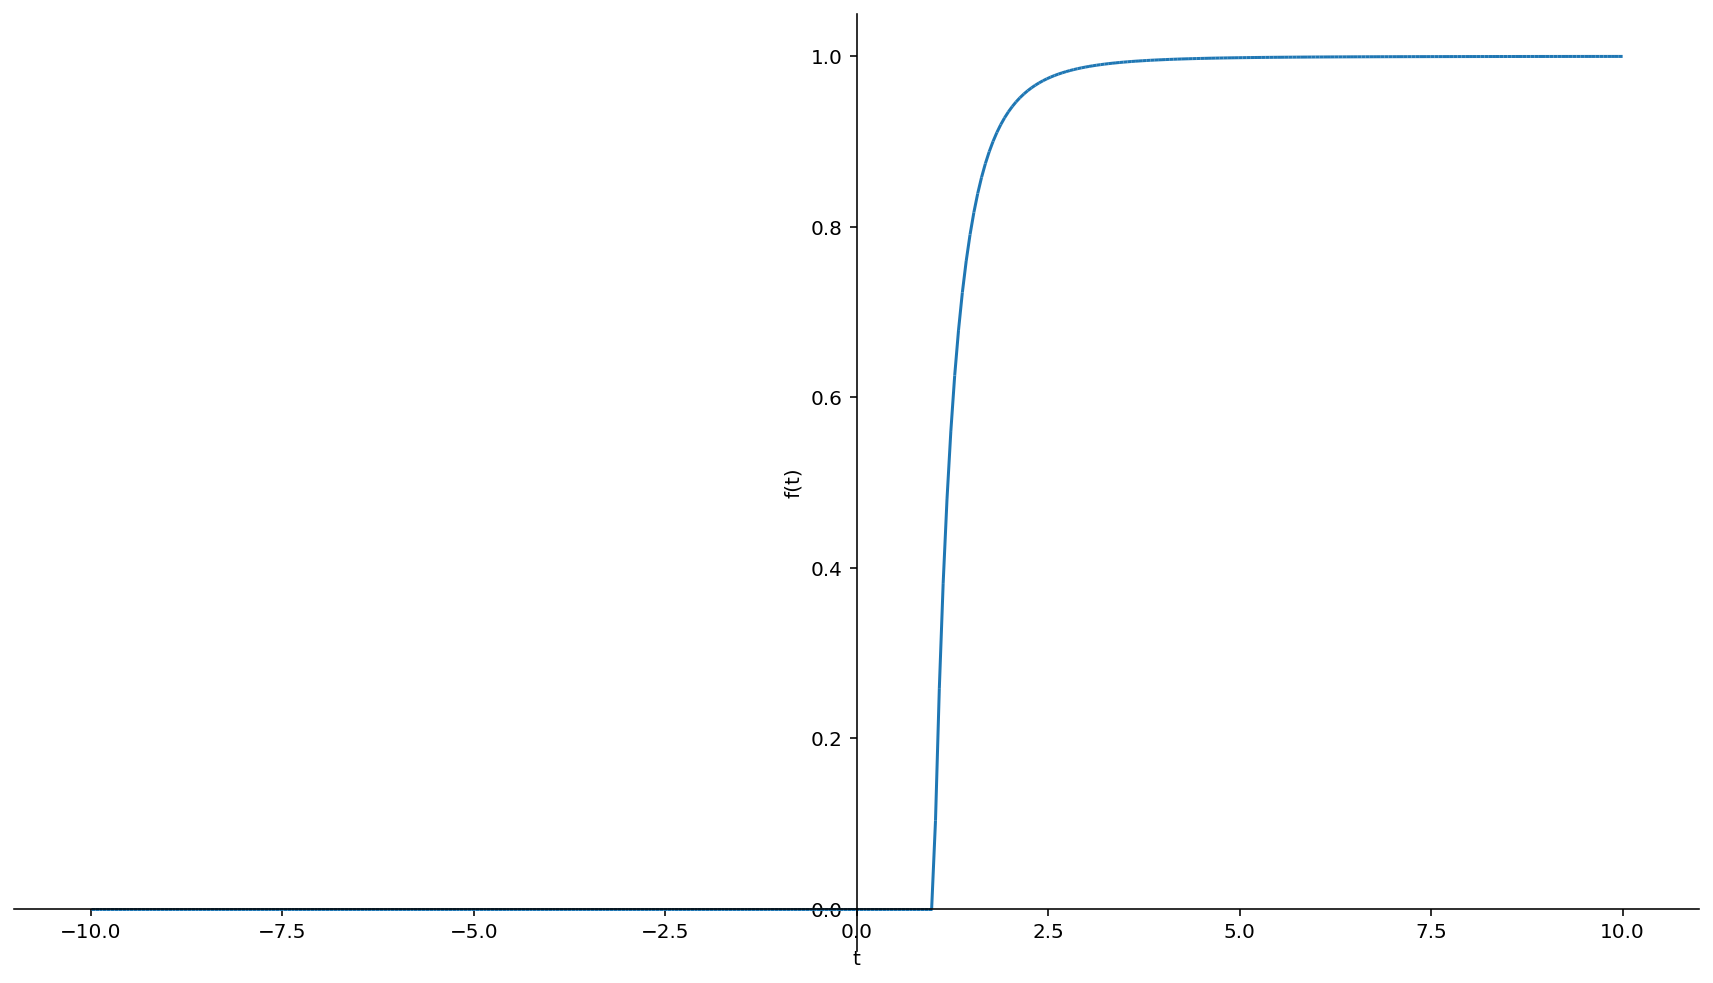

In [15]:
#Code206.py

# Symbol is a class that allows creating algebric expressions
# integrate(f,D) function calculates the integral of f over domain D 
from sympy import Symbol, oo, Piecewise, integrate 
from sympy.plotting import plot
from sympy.stats import ContinuousRV, density, E, variance,cdf

# symbols
x,t = Symbol('x'), Symbol('t')

# function f: checks if it is density, its integral has cdf properties
f    = Piecewise((4/x**5, x >= 1), (0, True))   ;print("f(x) = ",f)
val  = integrate(f,(x,-oo,+oo))                 ;print("f is normed ? surface = ", val)
F    = integrate(f,(x,-oo,t))                   ;print("F(t) = ", F)
print("Lim x->-oo F(x)= ", F.subs(t,-oo),"Lim x->+oo F(x)= ", F.subs(t,+oo))

# create RV X with f as PDF
X     = ContinuousRV(symbol=x, density= f)      ;print("PDF_X = ",density(X)(t))
cdf_X = cdf(X)(t)                               ;print("CDF_X = ",cdf_X)

EX2   = integrate(x**2 * f)
print("E(X)=",E(X), ",E(X^2)=",EX2, "=", E(X**2),",Var(X)=", variance(X))

# plot f and F
plot(f, adaptive=False, nb_of_points=400)
plot(F, adaptive=False, nb_of_points=400)

#______________________________   Output  ______________________________________
# f(x) =  Piecewise((4/x**5, x >= 1), (0, True))
# F(t) =  Min(1, t)**(-4) - 1/t**4
# Lim x->-oo F(x)=  0 Lim x->+oo F(x)=  1
# f is normed ? surface =  1
# PDF_X =  Piecewise((Piecewise((4/z**5, z >= 1), (0, True)), (z >= -oo) & (z < oo)), (0, True))
# CDF_X =  Min(1, z)**(-4) - 1/z**4
# E(X)= 4/3 ,E(X^2)= Piecewise((0, x <= 1), (2 - 2/x**2, True)) = 2 ,Var(X)= 2/9

In [16]:
#Code207.py

from sympy import S , Symbol, symbols, Rational
from sympy.stats import density, cdf
from sympy.stats import E, variance as V
from sympy.stats import (FiniteRV, Die, Coin, DiscreteUniform,  Bernoulli,
                        Binomial, Geometric, Poisson, Hypergeometric)

# I- Finite Random Var List
myDensity = {0: .1, 1: .2, 2: .3, 3: .4}
p  = S.One / 5
finiteRVs = {
        "Finite R.V       :":FiniteRV('X', myDensity),
        "Die6             :":Die('D6', 6),
        "Die4             :":Die('D4', 4),
        "Coin Half        :":Coin('C'),
        "Coin3/5          :":Coin('C2', Rational(3, 5)),
        "Discrete Uniform3:":DiscreteUniform('X', symbols('a b c')),
        "Discrete Uniform5:":DiscreteUniform('Y', list(range(5))),
        "Bernoulli3/4     :":Bernoulli('X', S(3)/4),
        "Bernoulli Half   :":Bernoulli('X', S.Half, 'Heads', 'Tails'),
        "Binomial Half 4  :":Binomial('X', 4, S.Half),
        "Hypergeometric   :":Hypergeometric('X', 10, 5, 3)
    }

# Print density, Expectation and Variance of each FRV in list above.
for k,X in finiteRVs.items() :
    Pdf, Ex, Vx = density(X).dict,  E(X), V(X)
    print(k,' \t ', Pdf, ' \t ', Ex, ' \t ', Vx)

print("-------------------------------------------------------------")
# II- Discrete (infinite) RV List
k     = Symbol("k")
lamda = Symbol("Lambda", positive=True)               # rate = lamda

discreteRVs = {
        "Geometric:":Geometric("X", p),               # Geometric(p=1/5)
        "Poisson  :":Poisson("X", lamda)              # Poisson(lambda)
    }
print("-----------------------------------------------------------")
for key,X in discreteRVs.items() :
    Pdf, Cdf,  Ex, Vx = density(X)(k), cdf(X)(k),  E(X), V(X)  #simplify(V(X))
    print(key,' \t ',Pdf, ' \t ', Cdf, ' \t ', Ex, ' \t ', Vx)

#______________________________   Output  ______________________________________
# R.V             Distribution                              E            Variance
# Finite R.V    :{0:0.1, 1:0.2, 2:0.3, 3:0.4}  	             2.00  	     1.00
# Die6          :{1:1/6, 2:1/6, 3:1/6, 4:1/6, 5:1/6, 6:1/6} 7/2  	       35/12
# Die4          :{1:1/4, 2:1/4, 3:1/4, 4: 1/4}  	          5/2  	       5/4
# Coin Half     :{H:1/2, T:1/2}                             H/2+T/2  	  (-H/2 + T/2)**2/2 + (H/2 - T/2)**2/2
# Coin3/5       :{H:3/5, T:2/5}                             3*H/5+2*T/5  2*(-3*H/5 + 3*T/5)**2/5 + 3*(2*H/5 - 2*T/5)**2/5
# Discrete Unif3:{b:1/3, c:1/3, a:1/3}  	                  a/3+b/3+c/3  (-a/3 - b/3 + 2*c/3)**2/3 + (-a/3 + 2*b/3 - c/3)**2/3 + (2*a/3 - b/3 - c/3)**2/3
# Discrete Unif5:{0:1/5, 1:1/5, 2:1/5, 3: 1/5, 4: 1/5}  	  2  	          2
# Bernoulli3/4  :{0:1/4, 1:3/4}                             3/4  	       3/16
# Bernoulli Half:{Tails:1/2, Heads:1/2}  	                  Heads/2+Tails/2  	  (-Heads/2 + Tails/2)**2/2 + (Heads/2 - Tails/2)**2/2
# BinomialcHalf4:{0:1/16, 1:1/4, 2:3/8, 3:1/4, 4:1/16}  	  2  	         1
# Hypergeometric:{0:1/12, 1:5/12, 2:5/12, 3:1/12}  	       3/2  	      7/12

# ------------------------------------------------------------------------
# Geometric:(4/5)**(k - 1)/5  	  Piecewise((1 - 5*(4/5)**(k + 1)/4, k >= 1), (0, True))  	  5  	  20
# Poisson  :Lambda**k*exp(-Lambda)/factorial(k)  	  Piecewise(((-Lambda**(-k - 1)*Lambda**(k + 1)*(k + 1)*exp(Lambda)*lowergamma(k + 1, Lambda)/factorial(k + 1) + exp(Lambda))*exp(-Lambda), k >= 0), (0, True))  	  Lambda  	  Lambda

Finite R.V       :  	  {0: 0.1, 1: 0.2, 2: 0.3, 3: 0.4}  	  2.00000000000000  	  1.00000000000000
Die6             :  	  {1: 1/6, 2: 1/6, 3: 1/6, 4: 1/6, 5: 1/6, 6: 1/6}  	  7/2  	  35/12
Die4             :  	  {1: 1/4, 2: 1/4, 3: 1/4, 4: 1/4}  	  5/2  	  5/4
Coin Half        :  	  {H: 1/2, T: 1/2}  	  H/2 + T/2  	  (-H/2 + T/2)**2/2 + (H/2 - T/2)**2/2
Coin3/5          :  	  {H: 3/5, T: 2/5}  	  3*H/5 + 2*T/5  	  2*(-3*H/5 + 3*T/5)**2/5 + 3*(2*H/5 - 2*T/5)**2/5
Discrete Uniform3:  	  {b: 1/3, c: 1/3, a: 1/3}  	  a/3 + b/3 + c/3  	  (-a/3 - b/3 + 2*c/3)**2/3 + (-a/3 + 2*b/3 - c/3)**2/3 + (2*a/3 - b/3 - c/3)**2/3
Discrete Uniform5:  	  {0: 1/5, 1: 1/5, 2: 1/5, 3: 1/5, 4: 1/5}  	  2  	  2
Bernoulli3/4     :  	  {0: 1/4, 1: 3/4}  	  3/4  	  3/16
Bernoulli Half   :  	  {Heads: 1/2, Tails: 1/2}  	  Heads/2 + Tails/2  	  (-Heads/2 + Tails/2)**2/2 + (Heads/2 - Tails/2)**2/2
Binomial Half 4  :  	  {0: 1/16, 1: 1/4, 2: 3/8, 3: 1/4, 4: 1/16}  	  2  	  1
Hypergeometric   :  	  {0: 1/12, 1: 5/12, 2

Geometric:  	  (4/5)**(k - 1)/5  	  Piecewise((1 - 5*(4/5)**(k + 1)/4, k >= 1), (0, True))  	  5  	  20


Poisson  :  	  Lambda**k*exp(-Lambda)/factorial(k)  	  Piecewise(((-Lambda**(-k - 1)*Lambda**(k + 1)*(k + 1)*exp(Lambda)*lowergamma(k + 1, Lambda)/factorial(k + 1) + exp(Lambda))*exp(-Lambda), k >= 0), (0, True))  	  Lambda  	  Lambda


Pmf de X :  {0: 1/16, 1: 1/4, 2: 3/8, 3: 1/4, 4: 1/16}
Pmf de Y :  {0: 1/256, 1: 1/32, 2: 7/64, 3: 7/32, 4: 35/128, 5: 7/32, 6: 7/64, 7: 1/32, 8: 1/256}
Pmf de Z :  {0: 1/4096, 1: 3/1024, 2: 33/2048, 3: 55/1024, 4: 495/4096, 5: 99/512, 6: 231/1024, 7: 99/512, 8: 495/4096, 9: 55/1024, 10: 33/2048, 11: 3/1024, 12: 1/4096}
Pmf de W :  {0: 1/4096, 1: 3/1024, 2: 33/2048, 3: 55/1024, 4: 495/4096, 5: 99/512, 6: 231/1024, 7: 99/512, 8: 495/4096, 9: 55/1024, 10: 33/2048, 11: 3/1024, 12: 1/4096}


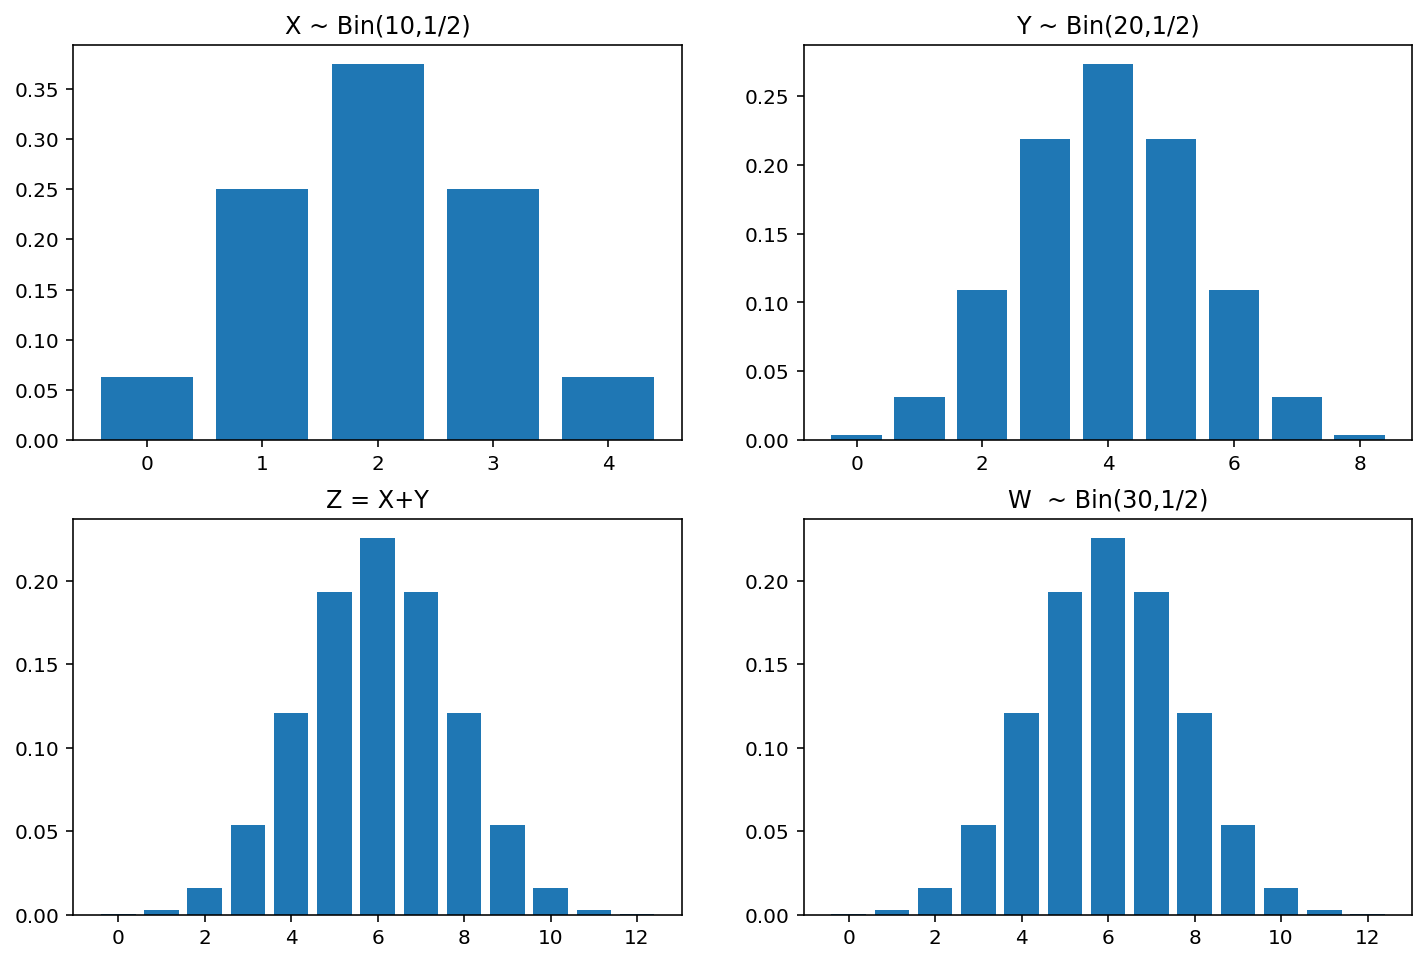

In [17]:
#Code208.py

from sympy.stats import Binomial
from sympy import S
from sympy.stats import density

# sum2Bin: creates two binomial r.v X,Y with parameters (n,p) and (m,p) as well
# as their sum Z. W is binomial r.v with parameters (n+m, p)
def sum2Bin(n, m, p):
    X, Y, W = Binomial('X', n, p), Binomial('Y', m, p), Binomial('X', n+m, p)
    Z = X + Y
    return [{ 'dic': density(X).dict, 'legend': 'X ~ Bin(10,1/2)'},
            { 'dic': density(Y).dict, 'legend': 'Y ~ Bin(20,1/2)'},
            { 'dic': density(Z).dict, 'legend': 'Z = X+Y'},
            { 'dic': density(W).dict, 'legend': 'W  ~ Bin(30,1/2)'}]

# plotter: plots X,Y,Z and W
def plotter(rv_infos):
    import matplotlib.pyplot as plt
    plt.figure(figsize=(12, 8))
    for i in range(len(rv_infos)):
        plt.subplot(221 + i).set_title(rv_infos[i]['legend'])
        plt.bar(list(rv_infos[i]['dic'].keys()), rv_infos[i]['dic'].values())
    plt.show()
#
s2b=sum2Bin(4, 8, S.Half)

#  prints associated distribution of X,Y,Z and W.
for i in range(len(s2b)):
    print("Pmf de " + s2b[i]['legend'][0] + ' : ', s2b[i]['dic'])
plotter(s2b)
#______________________________   Output  _____________________________________
# Pmf de X :  {0: 1/16, 1: 1/4, 2: 3/8, 3: 1/4, 4: 1/16}
# Pmf de Y :  {0: 1/256, 1: 1/32, 2: 7/64, ..., 8: 1/256}
# Pmf de Z :  {0: 1/4096, 1: 3/1024, 2: 33/2048, ..., 12: 1/4096}
# Pmf de W :  {0: 1/4096, 1: 3/1024, 2: 33/2048, ..., 2: 1/4096}

In [18]:
#Code209.py

# subs: substitutes parameters with values in the algebric expression
# simplify: simplifies an algebric expression.
from sympy.stats import Exponential, density, cdf, E, variance, given, P
from sympy import Symbol, simplify, And

lamda , z = Symbol("lambda", positive=True), Symbol("z")

X = Exponential("x", lamda)
pdf_X, cdf_X, E_X, V_X = density(X)(z),  cdf(X)(z), E(X), variance(X)
print('RV X. \n pdf:',pdf_X,'\n cdf:',cdf_X,'\n E:',E_X,'\n V:',V_X)

Z = X.subs(lamda,1/10)
pdf_Z = density(Z)(z)  ;cdf_Z = cdf(Z)(z) ;E_Z = E(Z) ;V_Z = variance(Z)
print('RV Z. \n pdf:', pdf_Z,'\n cdf:', cdf_Z,'\n E:',E_Z,'\n V:',V_Z)

Y = given(X - 3, X > 3)
pdf_Y = simplify(density(Y)(z))
P_Y5  = P(Y < 5).subs(lamda, 1/10)
P_Y10 = P(Y > 10).subs(lamda, 1/10)
P_Y510 = P(And(Y > 5,Y < 10)).subs(lamda, 1/10)
print('RV Y. \n pdf:', pdf_Y,'\n P(Y<5):',P_Y5,'\n P(Y<10):',P_Y10,'\n P(Y>5,Y<10):',P_Y510)

#______________________________   Output  ______________________________________
# RV X.
#  pdf: lambda*exp(-lambda*z)
#  cdf: Piecewise((1 - exp(-lambda*z), z >= 0), (0, True))
#  E: 1/lambda
#  V: lambda**(-2)
# RV Z.
#  pdf: 0.1*exp(-0.1*z)
#  cdf: Piecewise((1 - exp(-0.1*z), z >= 0), (0, True))
#  E: 10.0000000000000
#  V: 100.000000000000
# RV Y.
#  pdf: -lambda*(Heaviside(-z) - 1)*exp(-lambda*z)
#  P(Y<5): 0.393469340287367
#  P(Y<10): 0.367879441171442
#  P(Y>5,Y<10): 0.238651218541191

RV X. 
 pdf: lambda*exp(-lambda*z) 
 cdf: Piecewise((1 - exp(-lambda*z), z >= 0), (0, True)) 
 E: 1/lambda 
 V: lambda**(-2)


RV Z. 
 pdf: 0.1*exp(-0.1*z) 
 cdf: Piecewise((1 - exp(-0.1*z), z >= 0), (0, True)) 
 E: 10.0000000000000 
 V: 100.000000000000


RV Y. 
 pdf: -lambda*(Heaviside(-z) - 1)*exp(-lambda*z) 
 P(Y<5): 0.393469340287367 
 P(Y<10): 0.367879441171442 
 P(Y>5,Y<10): 0.238651218541191


E( X )=  0    V( X )=  1


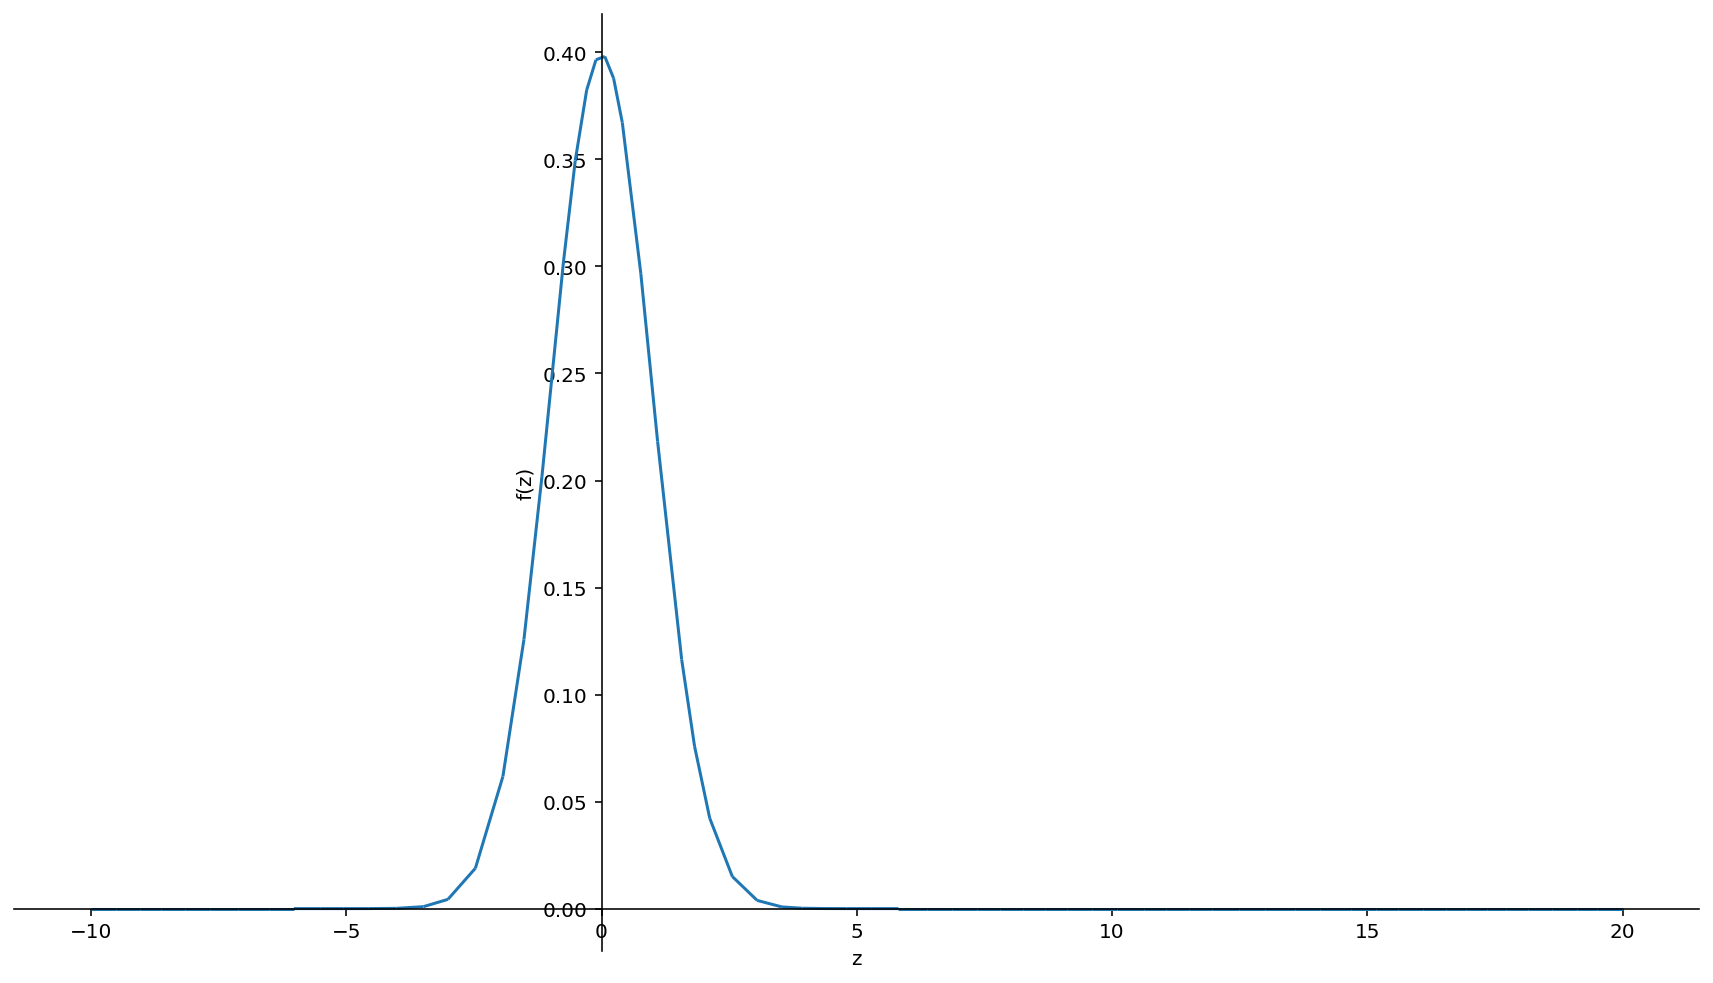

E( Y )=  5    V( Y )=  9


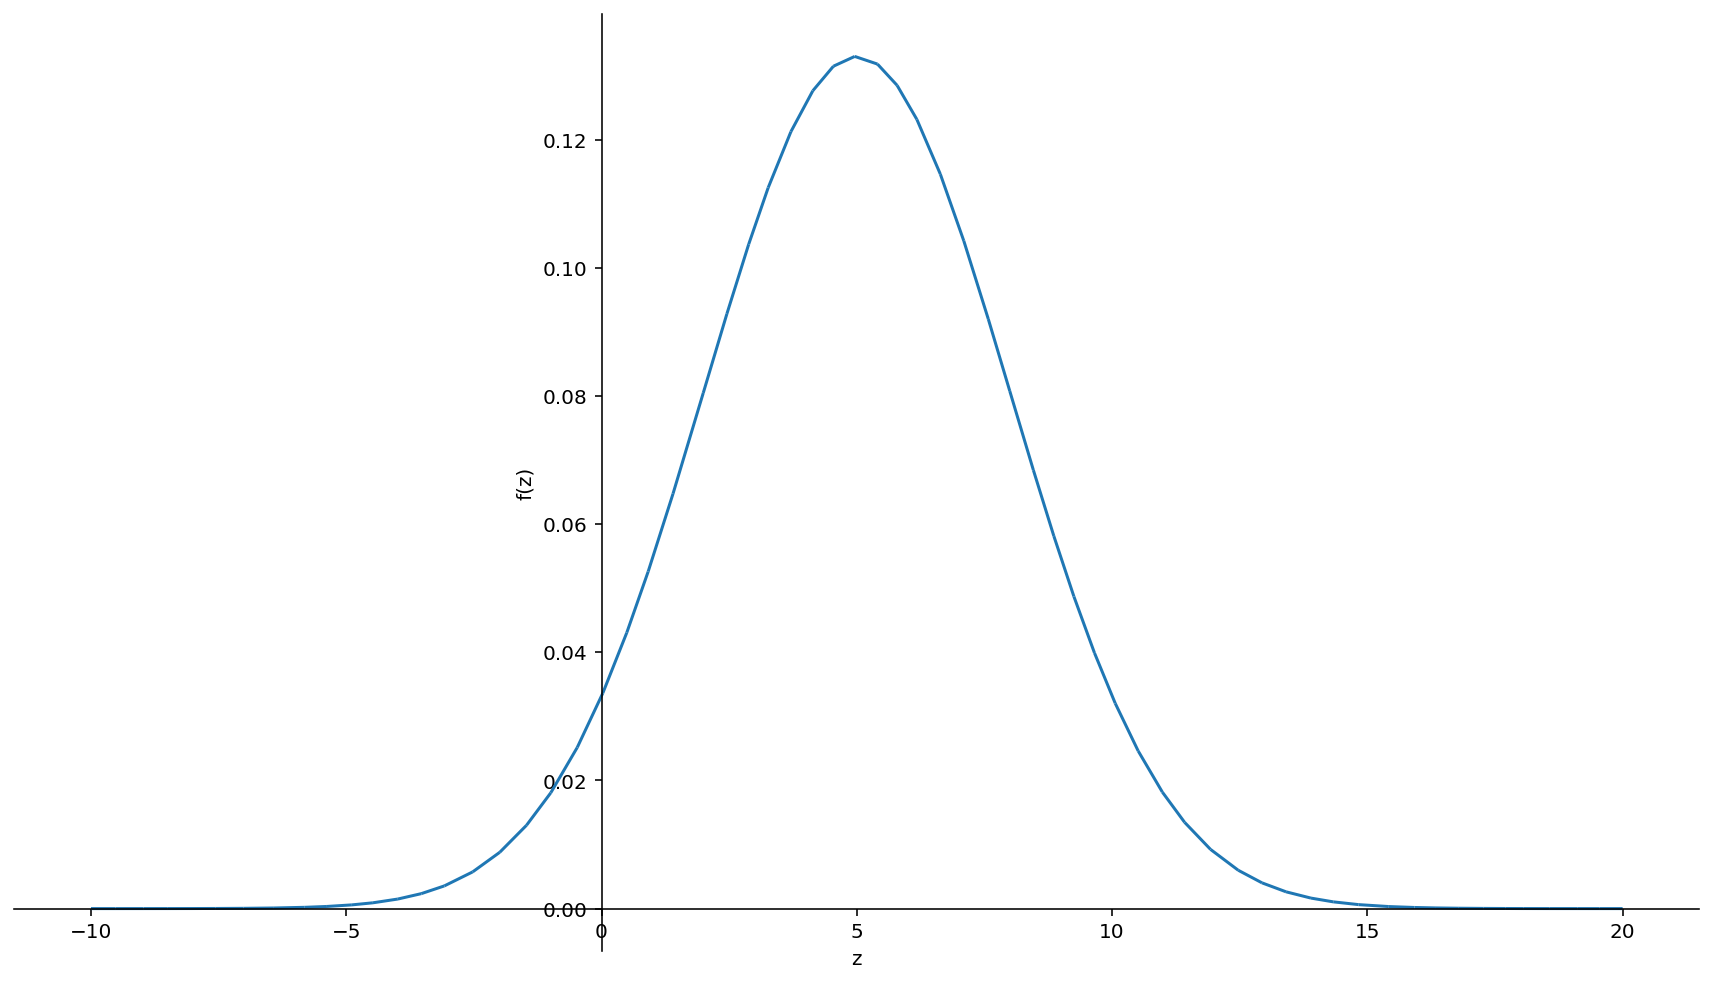

In [75]:
#Code210,py

from sympy.stats import E,variance, Normal,density
from sympy import Symbol
from sympy.plotting import plot

def processNormalRV(rv_Name, rv_X):
    print('E(',rv_Name,')= ',E(rv_X),'   V(',rv_Name,')= ',variance(rv_X))
    z = Symbol('z')
    plot(density(rv_X)(z), (z, -10, 20))

processNormalRV('X', Normal('X',0,1))
processNormalRV('Y', 3*Normal('X',0,1)+5)

#______________________________   Output  ______________________________________
# E( X )=  0    V( X )=  1
# E( Y )=  5    V( Y )=  9

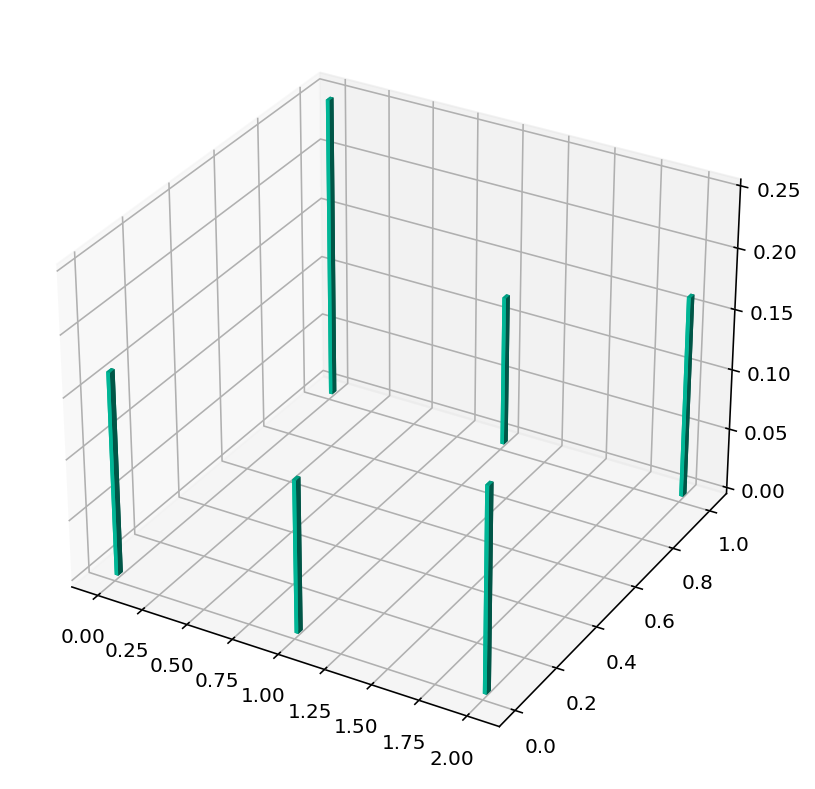

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


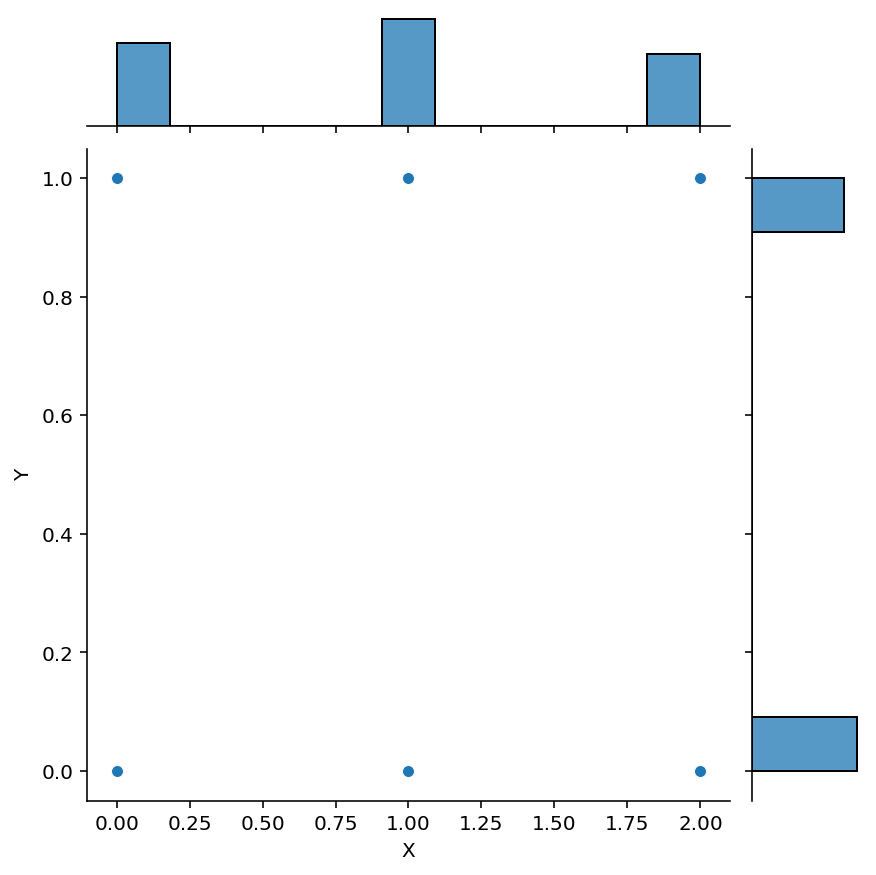

In [19]:
#Code211.py

import numpy as np
from functools import reduce
from scipy.stats import  rv_discrete
import matplotlib.pyplot as plt
import seaborn as sns
from random import random 

generateDRV=lambda rv: [rv.ppf(random()) for _ in range(1000)]

def getbar3Data(Rg_x, Rg_y, p_xy):
    xpos, ypos = reduce(lambda ls, e: ls+[e]*len(Rg_y), Rg_x, []) , [0,1]*len(Rg_x)
    zpos = np.zeros(len(xpos))
    dx, dy = np.ones(len(xpos))*0.02, np.ones(len(xpos))*0.02
    dz = list(p_xy.flatten())
    return xpos, ypos, zpos, dx, dy, dz

def plotjointDistribution(xpos, ypos, zpos, dx, dy, dz):
    fig = plt.figure()
    ax1 = fig.add_subplot(111, projection='3d')
    ax1.bar3d(xpos, ypos, zpos, dx, dy, dz, color='#00ceaa')
    plt.show()

# random variables
Rg_x, Rg_y = np.array([0,1,2]), np.array([0,1])
p_xy = np.array([[1/6,1/4,1/8],[1/8,1/6,1/6]])

# data for joint distribution plotting
xpos, ypos, zpos, dx, dy, dz = getbar3Data(Rg_x, Rg_y, p_xy)
plotjointDistribution(xpos, ypos, zpos, dx, dy, dz)

# data for marginal plotting
p_x, p_y = np.sum(p_xy, axis=0), np.sum(p_xy, axis=1)
rv_X = rv_discrete(name='X', values=(Rg_x, p_x)) 
rv_Y = rv_discrete(name='Y', values=(Rg_y, p_y)) 

sns.jointplot(generateDRV(rv_X),generateDRV(rv_Y)).set_axis_labels("X", "Y")

In [20]:
#Code212,py

import numpy as np
from sympy.stats import FiniteRV
from sympy.stats import E,variance
import math

XDensity,YDensity = {0:13/24,1:11/24},{0:7/24,1:5/12,2:7/24}
X, Y = FiniteRV('X',XDensity ), FiniteRV('Y',YDensity )

JDensity = {(0,0):1/6,(0,1):1/4,(0,2):1/8,(1,0):1/8,(1,1):1/6,(1,2):1/6}

ZDensity = {(k[0]-E(X))*(k[1]-E(Y)):v for k,v in JDensity.items()}
cov = np.dot(list(ZDensity.keys()),list(ZDensity.values()))

print("E(X)=",E(X),"   E(Y)=",E(Y))
print("V(X)=",variance(X),"   V(Y)=",variance(Y))
print("Cov(X,Y)=",cov)
print("Correlation Coefficient=",cov/(math.sqrt(variance(X))*math.sqrt(variance(Y))))

#______________________________   Output  _____________________________________
# E(X)= 0.458333333333333    E(Y)= 1.00000000000000
# V(X)= 0.248263888888889    V(Y)= 0.583333333333333
# Cov(X,Y)= 0.0416666666666667
# Correlation Coefficient= 0.109489780290272

E(X)= 0.458333333333333    E(Y)= 1.00000000000000
V(X)= 0.248263888888889    V(Y)= 0.583333333333333
Cov(X,Y)= 0.0416666666666667
Correlation Coefficient= 0.109489780290272


In [21]:
#Code213.py

from sympy import Symbol, integrate, Interval
from sympy.stats import density, E, variance as V
from math import sqrt

x = Symbol('x'); y = Symbol('y')

fxy = 3*x
fx = integrate(fxy,(y,0,x)) ; print("marginal of X:",fx)
fy = integrate(fxy,(x,y,1)) ; print("marginal of Y:",fy)

# Direct method
Ex , Ey = integrate(x*fx,(x,0,1)) , integrate(y*fy,(y,0,1))
print("E(X)=",Ex,"   E(Y)=",Ey)

Exy = integrate(integrate(x*y*fxy,(y,0,x)),(x,0,1)) ; print("E(X*Y)=",Exy)
cov = Exy-Ex*Ey ; print("Cov(X,y)=",cov)

Ex2 , Ey2 = integrate((x**2)*fx,(x,0,1)) , integrate((y**2)*fy,(y,0,1))
vx , vy = Ex2-Ex**2 , Ey2-Ey**2
print("V(X)=",vx) ; print("V(Y)=",vy)

cor = cov/(sqrt(vx)*sqrt(vy)) ; print("Correlation coefficient:",cor)

# ContinuousRV
from sympy.stats import ContinuousRV

X     = ContinuousRV(symbol=x, density= fx, set=Interval(0, 1))
Y     = ContinuousRV(symbol=y, density= fy, set=Interval(0, 1))
print("E(X)=",E(X), ",E(X^2)=", E(X**2),",Var(X)=", V(X))
print("E(Y)=",E(Y), ",E(Y^2)=", E(Y**2),",Var(Y)=", V(Y))

cov = Exy-E(X)*E(Y) ; print("Cov(X,y)=",cov)

cor = cov/(sqrt(V(X))*sqrt(V(Y))) ; print("Correlation coefficient:",cor)

#______________________________   Output  ______________________________________  
# marginal of X: 3*x**2
# marginal of Y: 3/2 - 3*y**2/2
# E(X)= 3/4    E(Y)= 3/8
# E(X*Y)= 3/10
# Cov(X,y)= 3/160
# V(X)= 3/80
# V(Y)= 19/320
# Correlation coefficient: 0.397359707119513

marginal of X: 3*x**2
marginal of Y: 3/2 - 3*y**2/2
E(X)= 3/4    E(Y)= 3/8
E(X*Y)= 3/10
Cov(X,y)= 3/160
V(X)= 3/80
V(Y)= 19/320
Correlation coefficient: 0.397359707119513


E(X)= 3/4 ,E(X^2)= 3/5 ,Var(X)= 3/80


E(Y)= 3/8 ,E(Y^2)= 1/5 ,Var(Y)= 19/320


Cov(X,y)= 3/160


Correlation coefficient: 0.397359707119513


In [22]:
# Code214.py

import numpy as np
from random import choices

def go_out():
    distance=0
    while True:
        s=choices([1,2,3],prob)[0]
        distance+=10 if s==1 else(7 if s==2 else 5)
        if(s==1):break
    return distance

n=100000
prob=[0.5,0.25,0.25]
d=[go_out() for _ in range(n)]

print("Expexted crossed distance: ",np.mean(d))

#______________________________   Output  ______________________________________
# Expexted crossed distance:  15.99408

Expexted crossed distance:  16.04021


In [23]:
#Code215.py

import numpy as np
from sympy import *
from sympy.stats import Poisson, Binomial, E
from sympy import Symbol


p, n, mu = Symbol("p"), Symbol("n"), Symbol("mu")
Y = Binomial("Y",n,1-p);  XgivenY = Poisson("X",mu*Y)
print('E(Y)   = ', E(Y))
print('E(X|Y) = ', E(XgivenY))
print('E(X)   = ', E(E(XgivenY)))

p0, mu0, n0 = 0.3, 100, 60
print('Resultat Symbolique :')
print("Esperance de Y        : ", E(Y).subs([(n,n0),(p,p0)]).doit())
print("Esperance de X|Y      : ", E(E(XgivenY)).subs([(n,n0),(p,p0),(mu,mu0)]).doit())

N        = 1000
Ye       = np.random.binomial(n0 ,1-p0, N)
XgivenYe = np.random.poisson(mu0*Ye, (N, len(Ye)))

print('Resultat Empirique :')
print("Esperance de Ye       : ", Ye.mean())
print("Esperance de X|Ye     : ", XgivenYe.mean())

#______________________________   Output  ______________________________________
# E(Y)   = Sum(Piecewise((_k*p**(-_k + n)*(1 - p)**_k*binomial(n, _k),
#                         (_k >= 0) & (_k <= n)), (0, True)), (_k, 0, n))
# E(X|Y) = mu*Y
# E(X)   = Sum(Piecewise((_k*mu*p**(-_k + n)*(1 - p)**_k*binomial(n, _k),
#                         (_k >= 0) & (_k <= n)), (0, True)), (_k, 0, n))
# Resultat Symbolique :
# Esperance de Y        :  41.99
# Esperance de X|Y      :  4199.99
# Resultat Empirique :
# Esperance de Ye       :  42.13
# Esperance de X|Ye     :  4213.06

E(Y)   =  Sum(Piecewise((_k*p**(-_k + n)*(1 - p)**_k*binomial(n, _k), (_k >= 0) & (_k <= n)), (0, True)), (_k, 0, n))


E(X|Y) =  mu*Y


E(X)   =  Sum(Piecewise((_k*mu*p**(-_k + n)*(1 - p)**_k*binomial(n, _k), (_k >= 0) & (_k <= n)), (0, True)), (_k, 0, n))
Resultat Symbolique :


Esperance de Y        :  41.9999999999998


Esperance de X|Y      :  4199.99999999999
Resultat Empirique :
Esperance de Ye       :  41.818
Esperance de X|Ye     :  4181.769239


/tmp/ipykernel_455/3215658481.py:8: RuntimeWarning: invalid value encountered in long_scalars
  return np.sum([i*(law(*args)==i).sum() for i in range(100)])/k


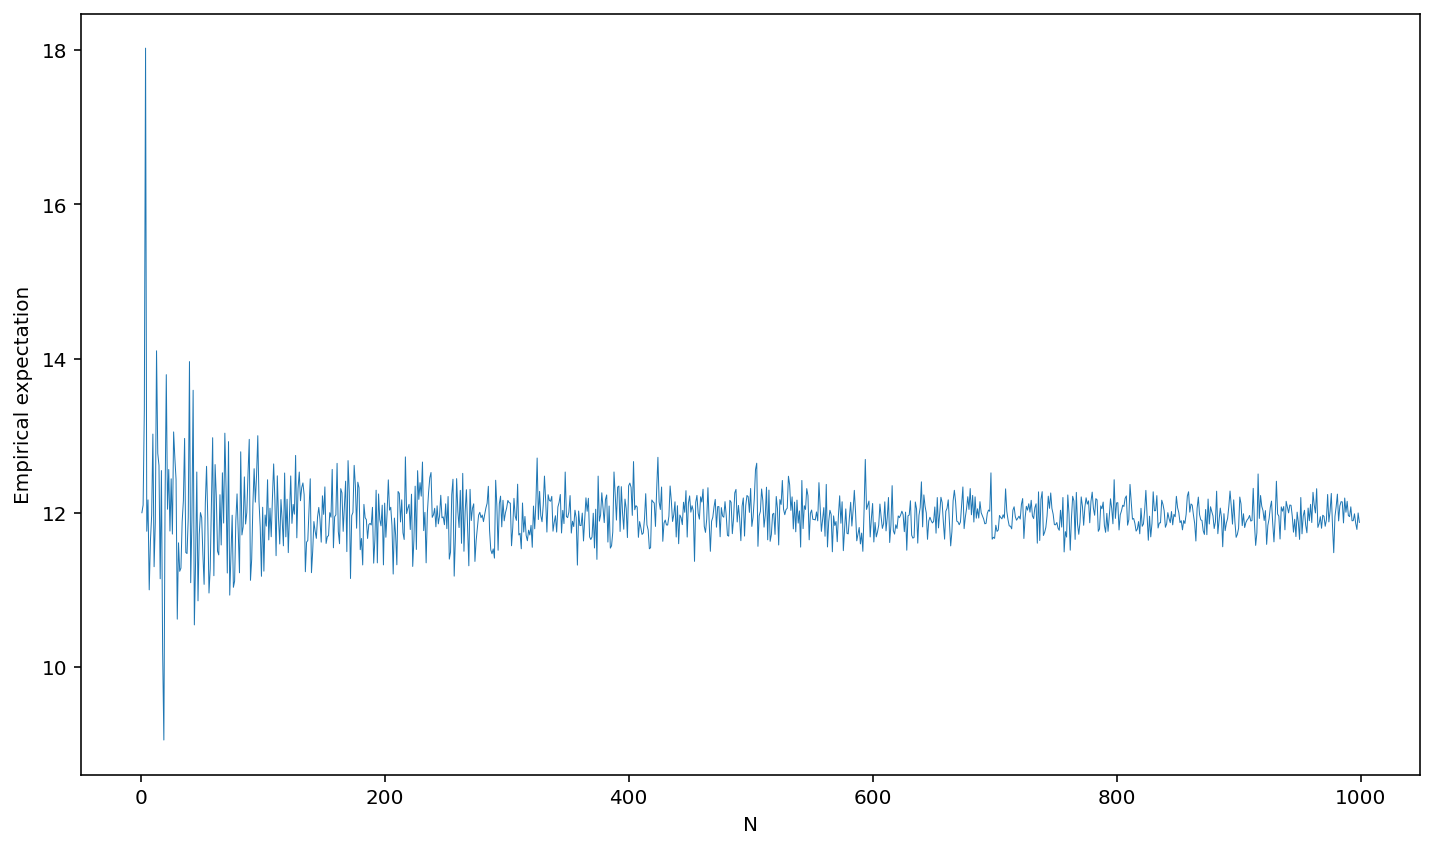

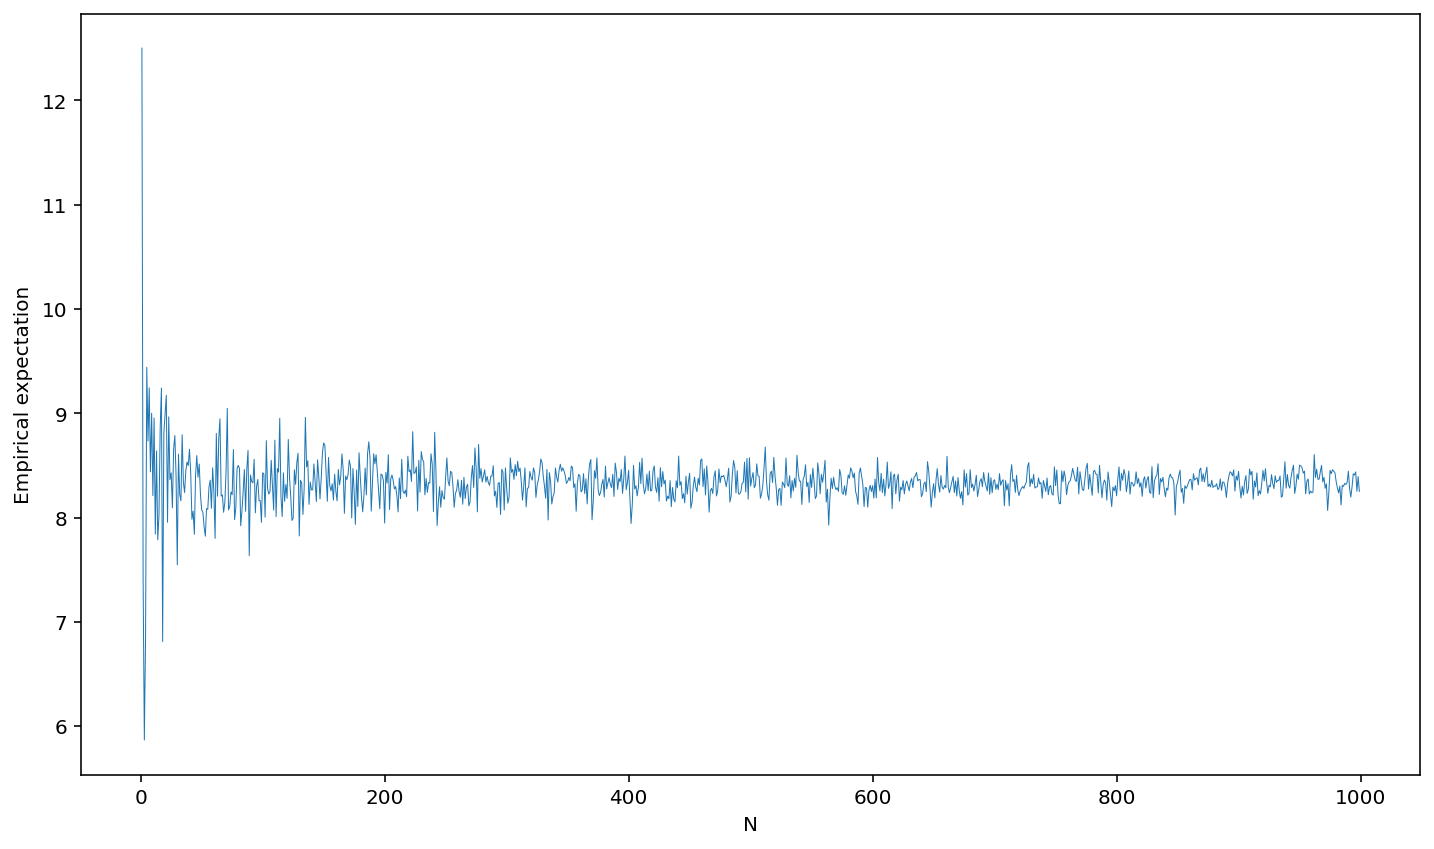

Theoretical Expectation - Binomial(np)=  8.333333333333332 , - Geometric  (1/p)=  12.0


In [24]:
#Code216.py

import numpy as np
from numpy.random import geometric, binomial

# Large number law for s.r.v
def generate(law, args, k):
    return np.sum([i*(law(*args)==i).sum() for i in range(100)])/k

def plotter(E):
    import matplotlib.pyplot as plt

    plt.plot(range(N), E, linewidth=0.5,label=str(N))
    plt.xlabel('N')
    plt.ylabel('Empirical expectation')
    plt.show()

p, N, n = 1/12, 1000, 100

E1 = [generate(geometric, [p,k*10], k*10)       for k in range(N)] ;plotter(E1)
E2 = [generate(binomial , [n,p, k*10 ], k*10) for k in range(N)] ;plotter(E2)

print('Theoretical Expectation - Binomial(np)= ', n*p , ', - Geometric  (1/p)= ', 1/p)

#______________________________   Output  ______________________________________
#Theoretical Expectation - Binomial(np)=  8.333333333333332 , - Geometric  (1/p)=  12.0

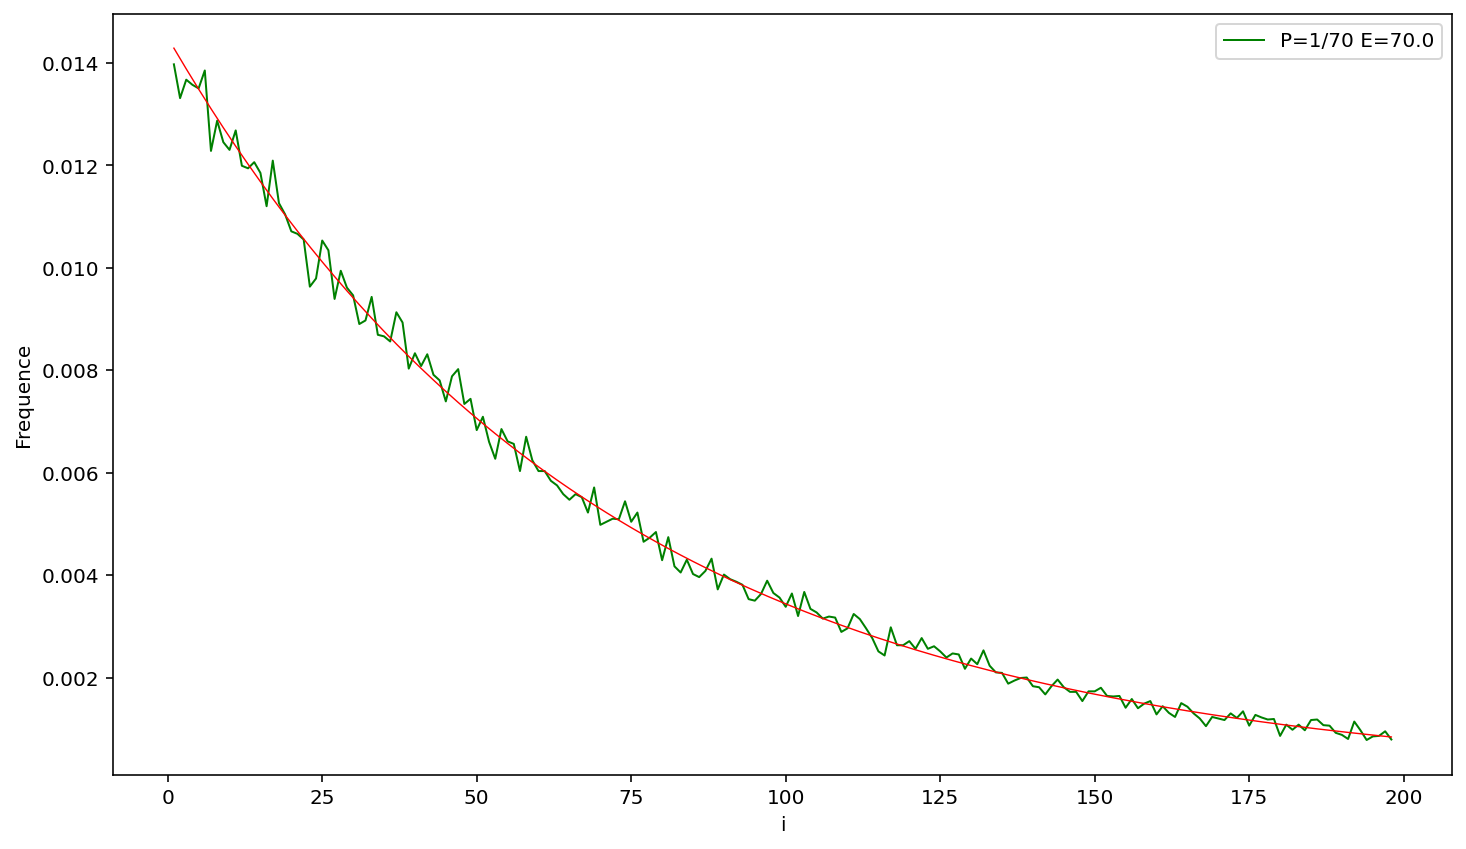

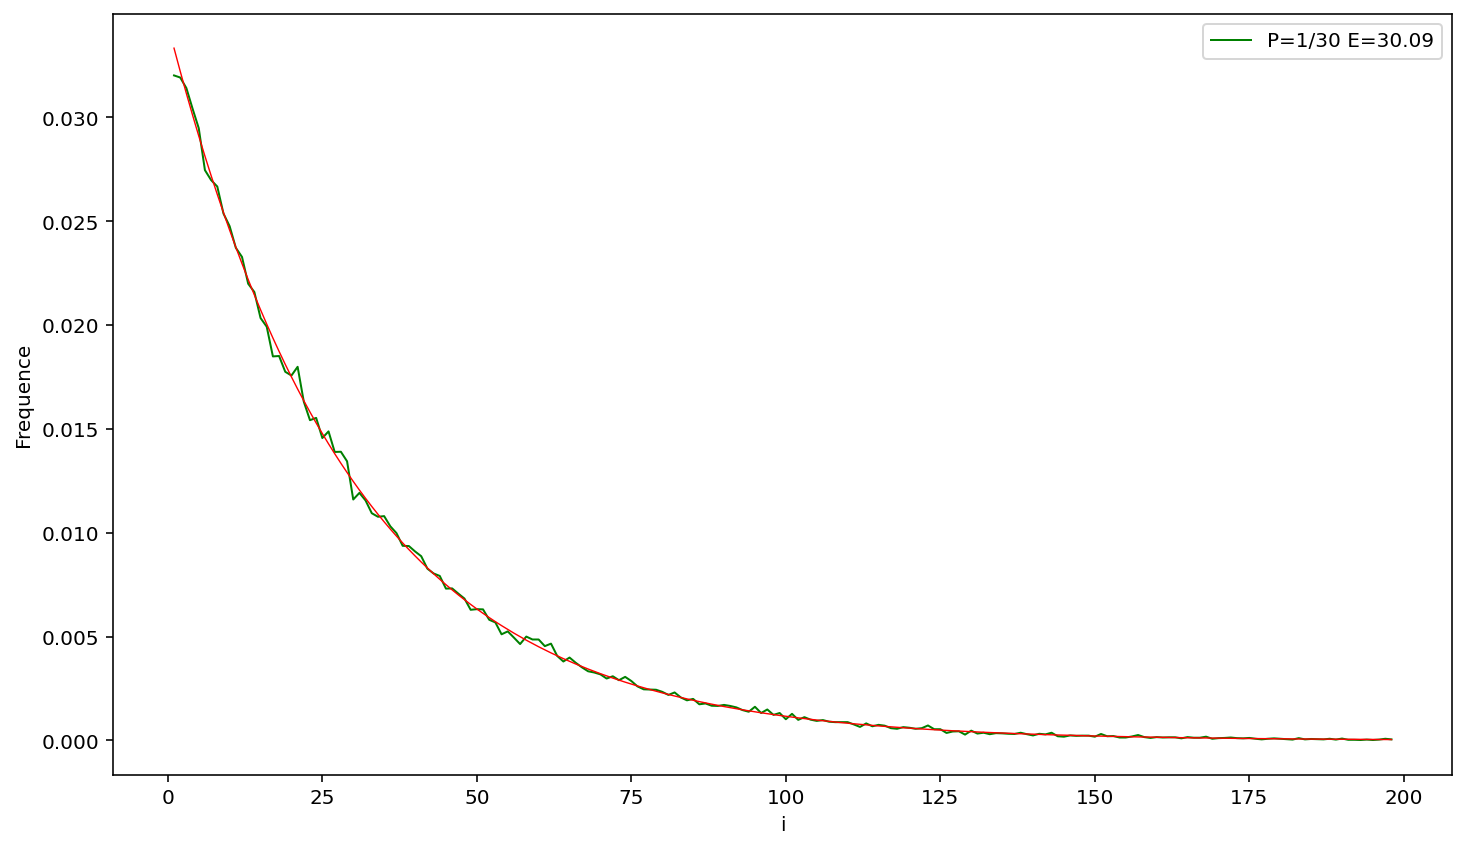

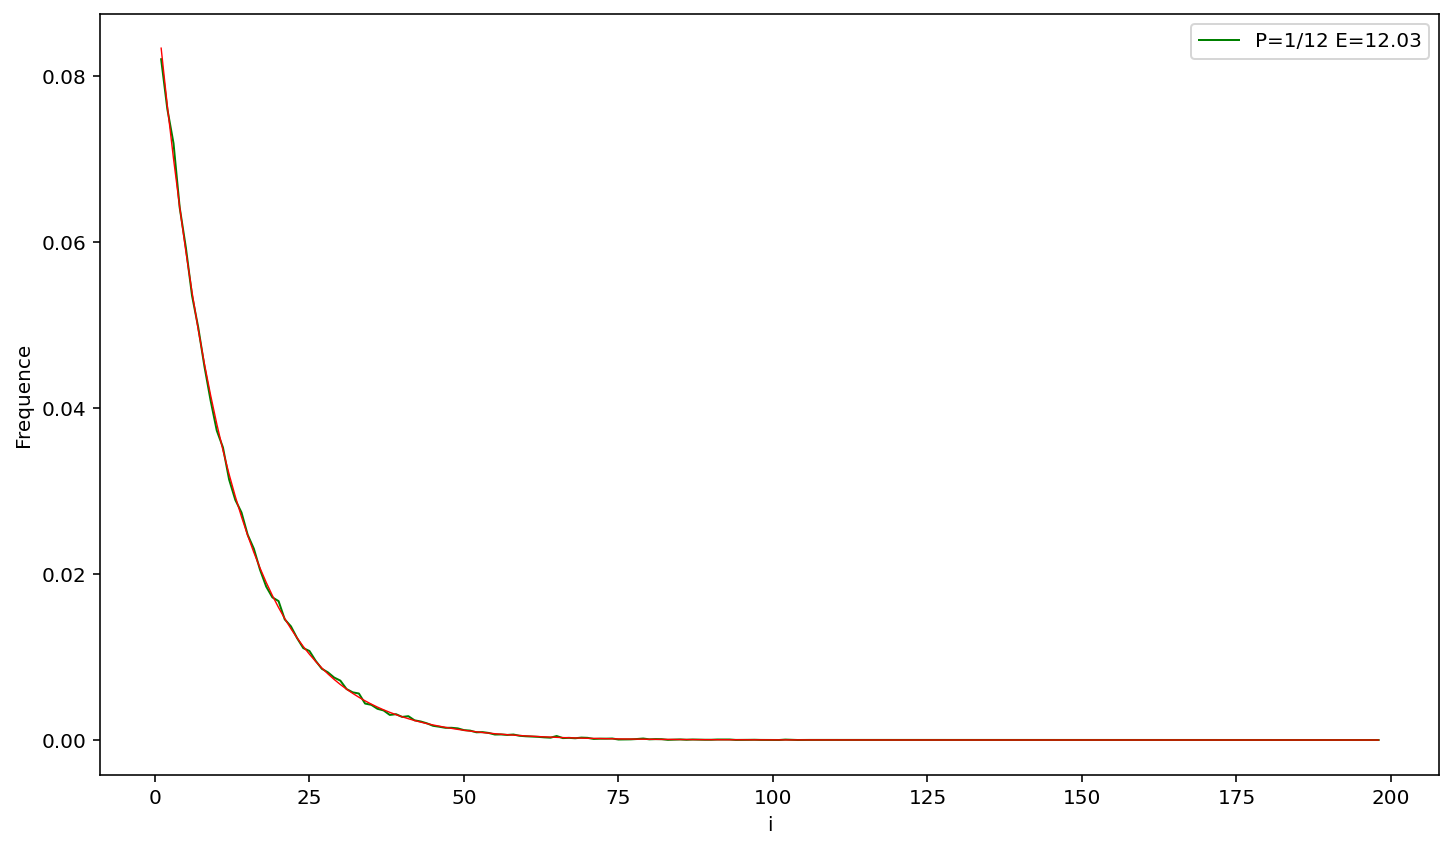

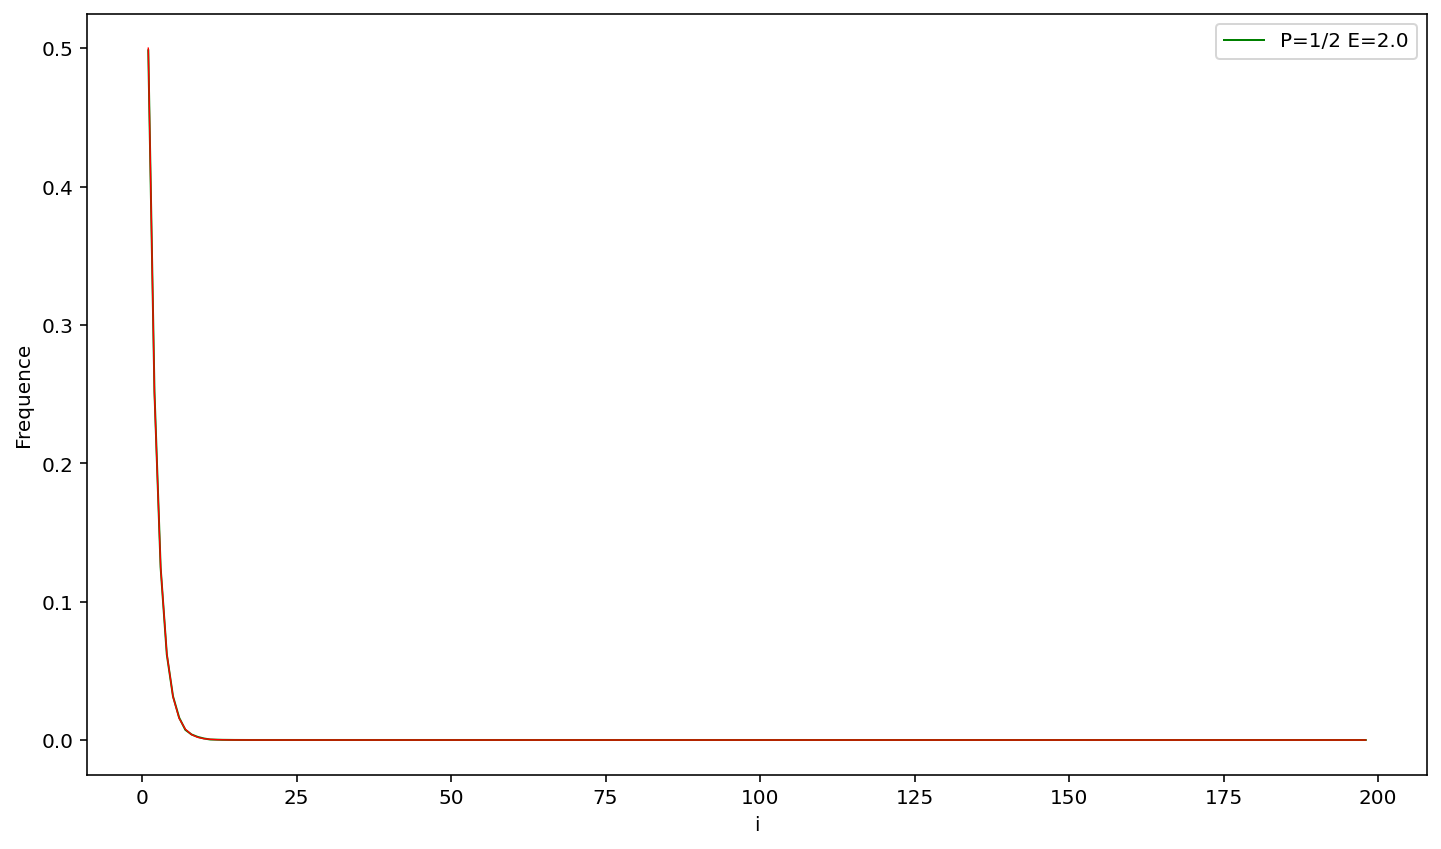

In [25]:
#Code217.py

import numpy as np
from numpy.random import geometric
import matplotlib.pyplot as plt
from fractions import Fraction
from scipy.stats import geom

N, M = 100000, 3000 # N: number of generated r.v,  M: the limit
parameters=[1/70,1/30,1/12,1/2]

# generate: generates N geometric r.v samples for different parameters
# and returns their frequencies
def generate():
    f=[]
    for i in range(len(parameters)):
        z= geometric(parameters[i], size=N)
        somme=np.array([(z==k).sum() for k in range(M)])/N
        f.append(somme)
    return f

freqs = generate()
esps =[f*range(M) for f in freqs ]

for i in range(len(parameters)):
    plt.plot(range(1,199), freqs[i][1:199], color='green', linewidth=1,label="P="
             +str(Fraction(parameters[i]).limit_denominator())+" E="+str(round(np.sum(esps[i]),2)))
    plt.legend(); plt.xlabel('i'); plt.ylabel('Frequence')
    plt.plot(range(1,199), geom.pmf(range(1,199), parameters[i]),linewidth=0.7, color='r')
    plt.show()

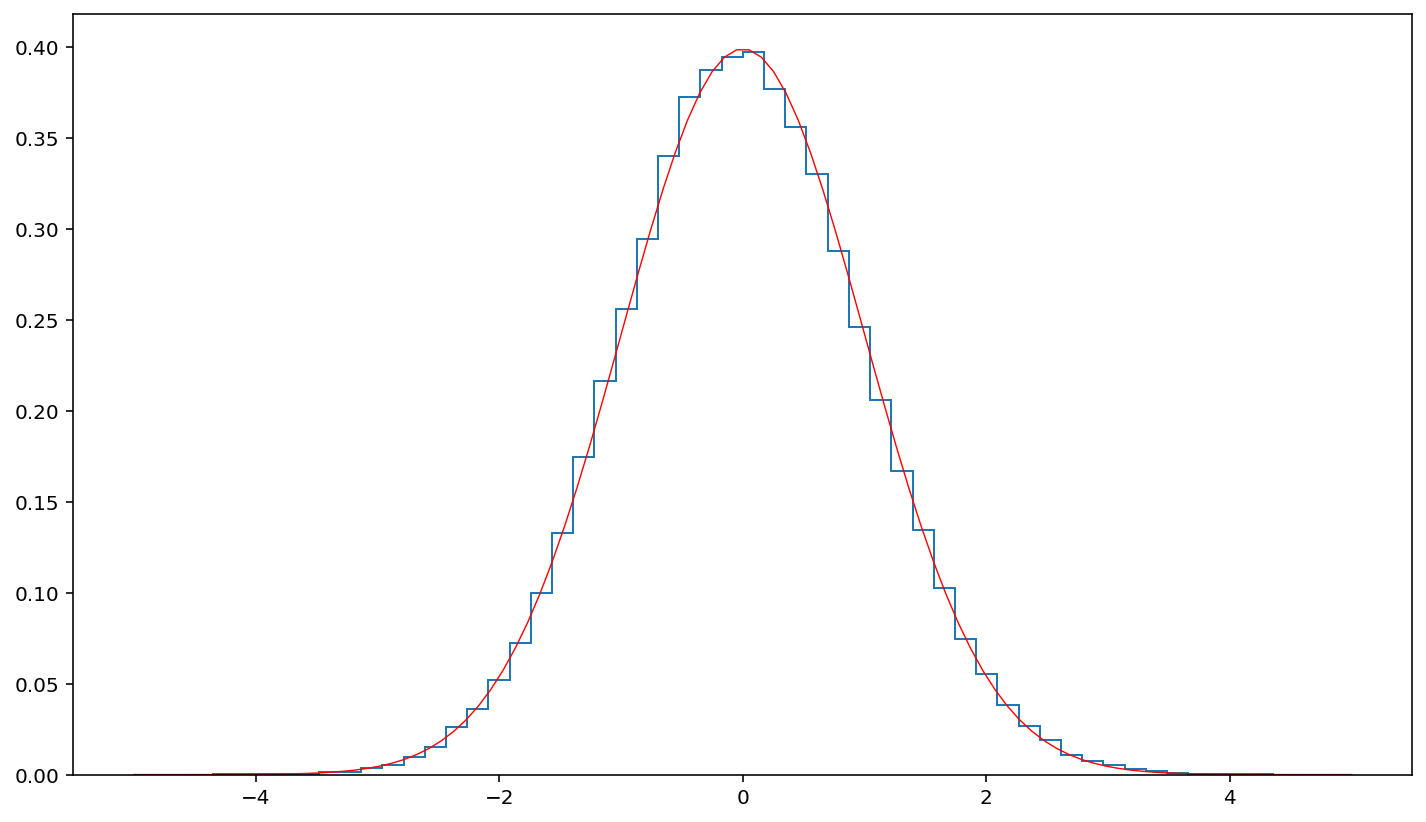

In [26]:
#Code218.py

import numpy as np
from numpy.random import geometric
import matplotlib.pyplot as plt
import math
from scipy.stats import norm

def generate(p,k,mu,sigma):
    z = geometric(p, size=k)
    s = (np.sum(z)-(k*mu))/(sigma*math.sqrt(k))
    return s

def plotter(result):
    # Central limit theorem using sampling as histogram
    M = max(np.abs(result))
    ls = np.linspace(start=-M, stop=+M,num=50 + 1, endpoint=True)
    plt.hist(result,bins=ls,density=1,histtype='step',label="Histogramme")

    # Central limit theorem using theoretic approximation (Normal distribution)
    mu, variance = 0, 1
    sigma = math.sqrt(variance)
    x = np.linspace(mu - 5*sigma, mu + 5*sigma, 100)
    plt.plot(x, norm.pdf(x, mu, sigma),linewidth=0.7, color='r')
    plt.show()

def TCL(N):
    k, p = 1000, 1/12
    mu, sigma = 1/p, math.sqrt((1-p)/(p**2))
    result = [generate(p,k,mu,sigma) for _ in range(N)]
    plotter(result)

TCL(100000)

SKlearn results: a= 9.908606190326537   b= 1.2873573700109313
Analytic: a= 9.263291199945215   b= 1.30049366970492


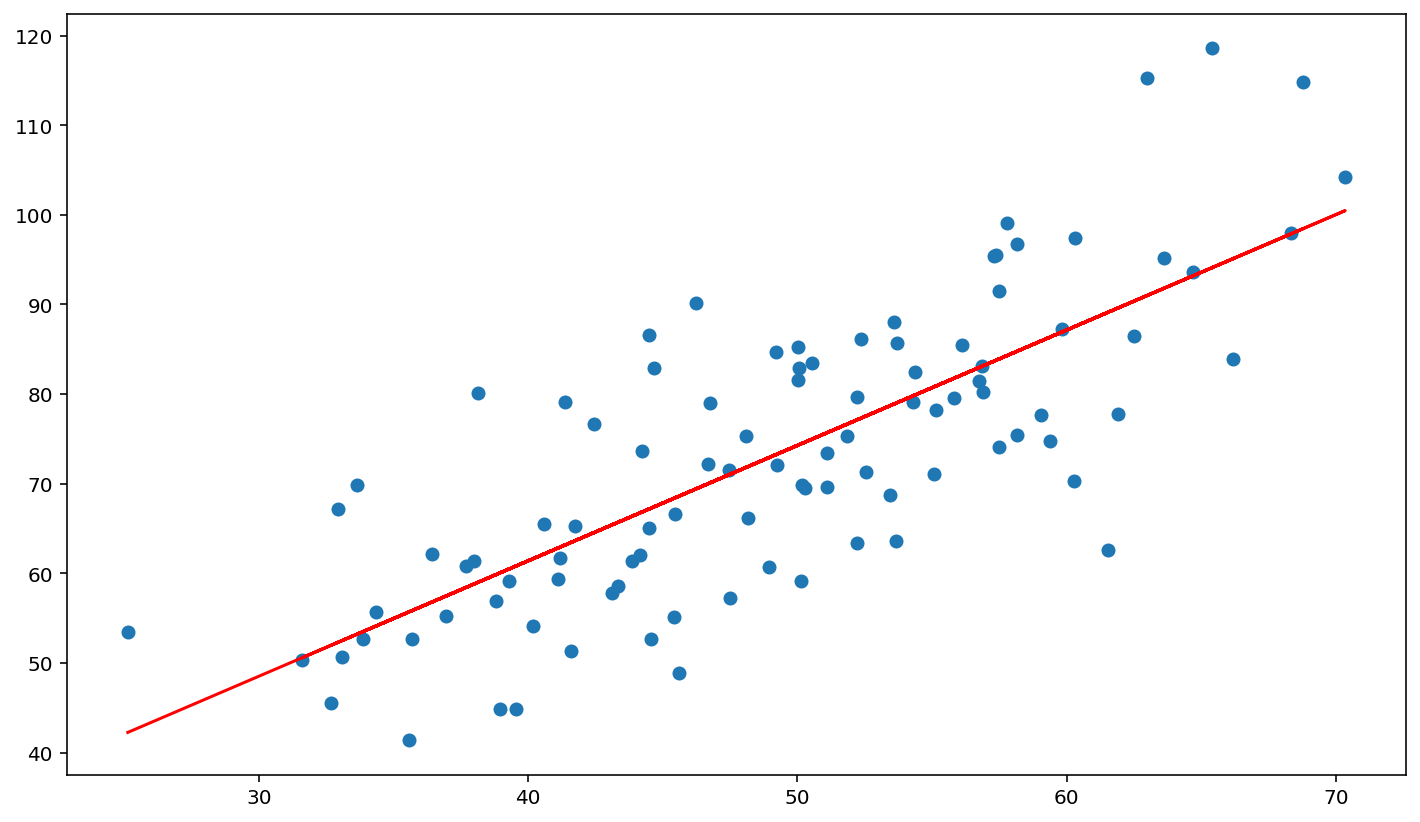

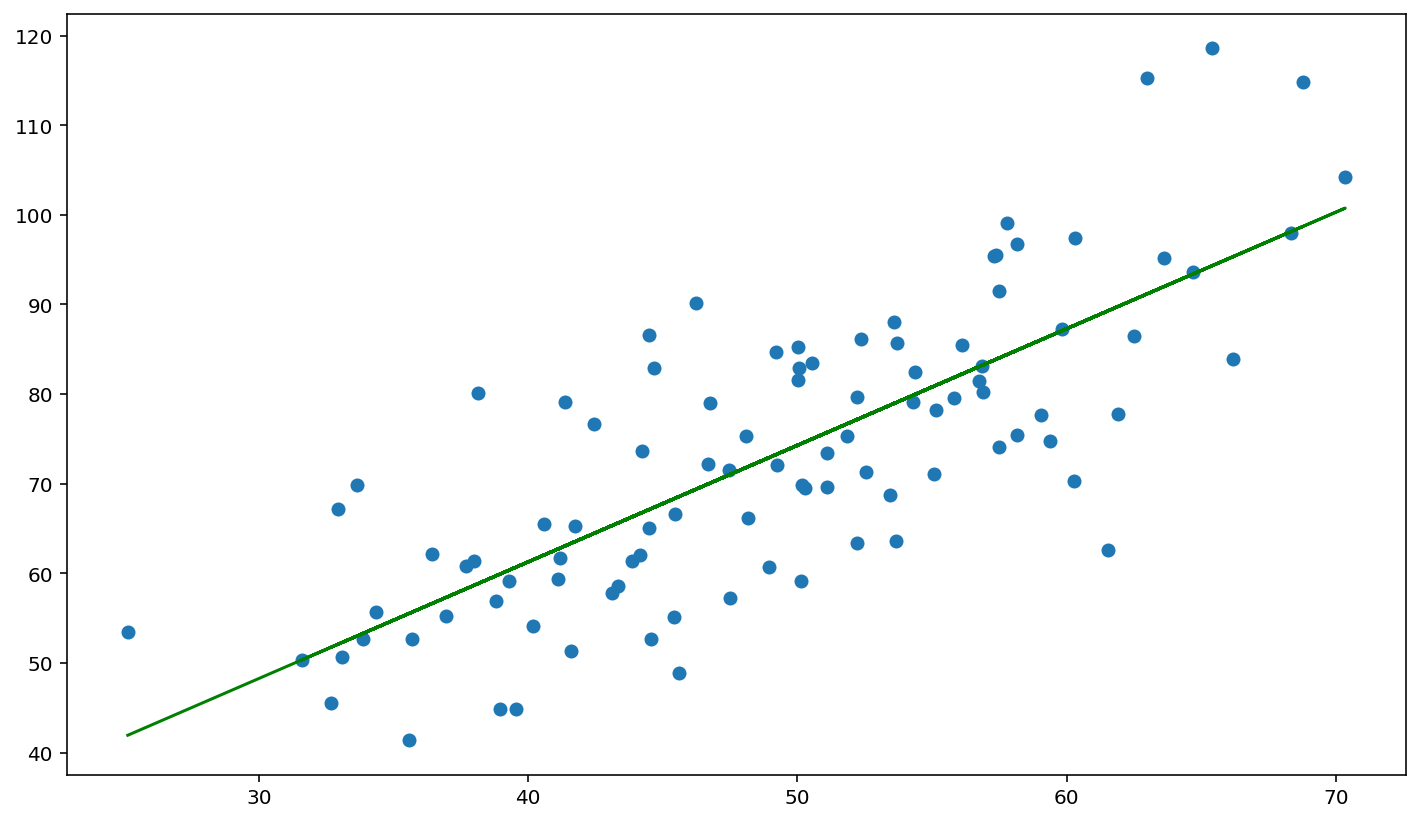

In [27]:
#Code219.py

import numpy as np
import matplotlib.pyplot as plt

# sklinreg: performs linear regression using sklearn package
def sklinreg():
    import pandas as pd                        # To read data
    from sklearn.linear_model import LinearRegression
    data = pd.read_csv('data.csv')             # load data set
    X = data.iloc[:, 0].values.reshape(-1, 1)  # values converts it into a numpy array
    Y = data.iloc[:, 1].values.reshape(-1, 1)  # -1 means that calculate the dimension of rows, but have 1 column
    linear_regressor = LinearRegression()      # create object for the class
    m=linear_regressor.fit(X, Y)               # perform linear regression
    Y_pred = linear_regressor.predict(X)       # make predictions
    return X,Y,m.intercept_[0],m.coef_[0][0],Y_pred

# analytic: performs linear regression using the results of the application
def analytic(X0,Y0):
    X=[X0[i][0] for i in range(len(X0))]
    Y=[Y0[i][0] for i in range(len(Y0))]
    Ex,Ey,Vx=np.mean(X),np.mean(Y),np.var(X)
    Cov=np.cov(X,Y)[0][1]
    b=Cov/Vx; a=Ey-Ex*b
    predictedY=a+b*np.array(X)
    return a,b,predictedY

def plotter(X,Y,predictedY,col):
    plt.scatter(X, Y)
    plt.plot(X, predictedY, color=col)
    plt.show()

X,Y,ska,skb,skY_pred=sklinreg()
print("SKlearn results: a=",ska,"  b=",skb)

anala,analb,analY_pred=analytic(X,Y)
print("Analytic: ""a=",anala,"  b=",analb)

plotter(X,Y,skY_pred,'red')
plotter(X,Y,analY_pred,'green')

#______________________________   Output  ______________________________________
# SKlearn results: a= 9.908606190326537   b= 1.2873573700109313
# Analytic: a= 9.263291199945208   b= 1.3004936697049203